In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr
from keras.preprocessing import sequence
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation,Concatenate
import hickle as hkl
from keras.preprocessing import sequence
import re
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
os.chdir("/Polycarbon/hand Motion Clasification")

In [3]:
def read_in_folder(folder_path,gesture_name):
    x=[]
    y=[]
    for file in os.listdir(folder_path):
        if( "-L-" in file): 
            L_hand_file=  folder_path +"/"+file
            R_hand_file=  folder_path +"/"+ re.sub(r"-L-","-R-",file)
            dL=pr.read_emg(L_hand_file).dropna().astype(float)
            dR=pr.read_emg(R_hand_file).dropna().astype(float)
            if(gesture_name=="0"):
                if(dL.Time.size>900):
                    T1 =  pr.find_active_time(dL.Time,dL.loc[:,['gx','gy','gz']])
                    T2 =  pr.find_active_time(dR.Time,dR.loc[:,['gx','gy','gz']])
                    if (len(T1)==2):
                        T = (np.array(T1)+np.array(T2))/2
                        Lhand = dL[dL.Time>=T[0]].T.values[1:]
                        Rhand = dR[dR.Time>=T[0]].T.values[1:]
                        x.append([Lhand,Rhand])
                        y.append(gesture_name)
            else:
                Lhand = dL.T.values[1:]
                Rhand = dR.T.values[1:]
                x.append([Lhand,Rhand])
                y.append(gesture_name)
            #print("success :"+L_hand_file+"__"+R_hand_file)
    return x,y

for n,sample in enumerate(os.listdir("Data/")[:50]):
    x = []
    y = []
    if(os.path.isdir("Data/"+sample) and sample!=".ipynb_checkpoints"):
        for i in range(1,16):
            filename = "M"+str(i)+"-"+sample  
            if len(os.listdir("Data/"+sample+"/"+filename))==2:
                for fd in os.listdir("Data/"+sample+"/"+filename):
                    filepath="Data/"+sample+"/"+filename+"/"+fd+"/"
                    u,v = read_in_folder(filepath,str(i)+fd.lower())
                    x.extend(u)
                    y.extend(v)
            else:
                filepath="Data/"+sample+"/"+filename
                u,v = read_in_folder(filepath,str(i))
                x.extend(u)
                y.extend(v)
    data = {"data":x,"label":y}
    hkl.dump( data, "full data/"+sample+".hkl")
    print("success"+sample+".hkl")

successAmnoey.hkl
successamnuay.hkl
successampai2.hkl
successangkana.hkl
successAphinop.hkl
successAueporn.hkl
successBancha.hkl
successBenjarat.hkl
successBoonching.hkl
successBuntean.hkl
successBuntra.hkl
successCharuves_Krasaerot.hkl
successChatri.hkl
successDonsatid.hkl
successDuangporn.hkl
successDuenpen.hkl
successdusid.hkl
successGulthida.hkl
successJamroen.hkl
successJamroen_Murangkerd.hkl
successJinda_Jaichuphan.hkl
successJiratchaya.hkl
successJittana Jaroenrak.hkl
successKamon.hkl
successKarnda.hkl
successKeawta.hkl
successkhanittha.hkl
successkobkeaw.hkl
successLadawan.hkl
successlamphueng.hkl
successlamyong.hkl
successlaong krue.hkl
successLumyong.hkl
successMayuree.hkl
successMayuree2.hkl
successMink.hkl
successMongkhon.hkl
successNapas.hkl
successNarin.hkl
successNarin_Prang.hkl
successnarumon.hkl
successNittaya.hkl
successonsa.hkl
successOranut.hkl
successPagapan.hkl
successpetch.hkl
successPhimjai saensut.hkl
successPichaya.hkl
successPikool.hkl
successpradit.hkl


เพิ่มข้อมูลไปที่ละ10คนแล้วบันทึก acc. ที่ได้

# 50 sample

In [51]:
x=[]
y=[]
for sample_file in os.listdir("Trimed data/")[:50]:
    if( sample_file!=".ipynb_checkpoints"):
        d= hkl.load("Trimed data/"+sample_file)
        x.extend(d["data"])
        y.extend(d["label"])
        print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Gulthida.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : lamphueng.hkl
success : lamyong.hkl
success : laong krue.hkl
success : Lumyong.hkl
success : Mayuree.hkl
success : Mayuree2.hkl
success : Mink.hkl
success : Mongkhon.hkl
success : Napas.hkl
success : Narin.hkl
success : Narin_Prang.hkl
success : narumon.hkl
success : Nittaya.hkl
success : onsa.hkl
success : Or

In [52]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
#X =np.concatenate((XL[:,16:,534:712], XR[:,16:,534:712]), axis=1)
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)


In [7]:
class_num=['1', '10', '5', '6', '9']
X=[t for t,label in zip(X,y_e) if(label in encoder.transform(class_num))]
y_e= [label for label in y_e if(label in encoder.transform(class_num))]

In [8]:
e=preprocessing.LabelEncoder()
e.fit(encoder.inverse_transform(y_e))
y_e=e.transform(encoder.inverse_transform(y_e))

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
from sklearn.preprocessing import normalize
y_e = np.array(y_e)
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[y_e==gt][:,ch] = normalize(X[y_e==gt][:,ch])

In [56]:
def build_model2(window_length,feature_length):
    input_signal = Input(shape=(window_length,feature_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    
    x = Flatten()(x)
   # x = Dropout(0.5)(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(17, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model(window_length,feature_length):
    input_signal = Input(shape=(window_length,feature_length),name="input_signal")
    x = LSTM(100, dropout_U=0.3)(input_signal)
    x=Dense(80)(x)
    x=Dropout(0.2)(x)
    dense_out=Dense(17, activation="softmax")(x)
    model = Model(inputs=[input_signal], outputs=[dense_out])
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

In [35]:
len(y_e)

7379

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y_e,test_size=0.2,stratify=y_e)

model=build_model2(X.shape[1],X.shape[2])  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 500, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
5903/5903 [==============================] - 24s 4ms/step - loss: 2.8052 - acc: 0.1035
Epoch 2/100
5903/5903 [==============================] - 2s 400us/step - loss: 2.7095 - acc: 0.1809
Epoch 3/100
5903/5903 [==============================] - 2s 255us/step - loss: 2.5706 - acc: 0.2516
Epoch 4/100
5903/5903 [==============================] - 2s 382us/step - loss: 2.3601 - acc: 0.3339
Epoch 5/100
5903/5903 [==============================] - 2s 285us/step - loss: 2.0567 - acc: 0.4145 0s - loss: 2.1000 - acc: 0.40 - ETA: 0s - loss: 2.0693 - acc: 0.411
Epoch 6/100
5903/5903 [==============================] - 1s 214us/step - loss: 1.6947 - acc: 0.5180
Epoch 7/100
5903/5903 [==============================] - 1s 227us/step - loss: 1.3620 - acc: 0.6177
Epoch 8/100
5903/5903 [==============================] - 1s 204us/step - loss: 1.0884 - acc: 0.6971
Epoch 9/100
5903/5903 [==============================] - 1s 219us/step - loss: 0.8775 - acc: 0.7581
Epoch 10/100
5903/5903 [=========

5903/5903 [==============================] - 1s 203us/step - loss: 0.0016 - acc: 1.0000 0s - loss: 0.0016 - acc
Epoch 76/100
5903/5903 [==============================] - 1s 204us/step - loss: 0.0015 - acc: 1.0000
Epoch 77/100
5903/5903 [==============================] - 1s 202us/step - loss: 0.0015 - acc: 1.0000 0s - loss: 0.0015 - acc: 1.
Epoch 78/100
5903/5903 [==============================] - 1s 207us/step - loss: 0.0014 - acc: 1.0000 0s - loss: 0.0014 - acc:
Epoch 79/100
5903/5903 [==============================] - 1s 202us/step - loss: 0.0014 - acc: 1.0000 0s - loss: 0.0014 - acc: 1.00
Epoch 80/100
5903/5903 [==============================] - 1s 201us/step - loss: 0.0014 - acc: 1.0000 0s - loss: 0.0013 - acc:
Epoch 81/100
5903/5903 [==============================] - 1s 205us/step - loss: 0.0014 - acc: 1.0000
Epoch 82/100
5903/5903 [==============================] - 1s 202us/step - loss: 0.0013 - acc: 1.0000 0s - loss: 0.0013 - a
Epoch 83/100
5903/5903 [===========================

In [62]:
t=[]
t.append(hkl.load("week1/test file stream/amnuayx1t0.hkl"))
t.append(hkl.load("week1/test file stream/amnuayx1t1.hkl"))
t.append(hkl.load("week1/test file stream/amnuayx1t2.hkl"))
t.append(hkl.load("week1/test file stream/amnuayx1t3.hkl"))
for tt in t:
    print("from stream : " +  str(tt["predict"]))
    print("from jupyter : " +  str(model.predict(tt["data"])))

from stream : [[0.   0.07 0.   0.   0.01]]
from jupyter : [[9.99e-01 1.67e-11 1.50e-08 2.73e-14 5.25e-10 1.45e-06 4.54e-10 1.30e-07
  1.19e-11 3.36e-11 1.46e-07 7.17e-05 5.13e-14 1.57e-04 4.13e-11 7.91e-08
  1.66e-08]]
from stream : [[0.   0.07 0.   0.   0.01]]
from jupyter : [[9.99e-01 1.67e-11 1.50e-08 2.73e-14 5.25e-10 1.45e-06 4.54e-10 1.30e-07
  1.19e-11 3.36e-11 1.46e-07 7.17e-05 5.13e-14 1.57e-04 4.13e-11 7.91e-08
  1.66e-08]]
from stream : [[6.55e-04 2.06e-05 1.53e-05 1.33e-04 9.96e-01]]
from jupyter : [[3.82e-06 9.60e-14 5.33e-09 9.04e-14 1.88e-09 9.20e-10 2.56e-05 1.63e-08
  4.38e-09 3.96e-08 1.09e-06 7.72e-09 3.72e-11 2.45e-04 1.33e-11 3.43e-09
  3.32e-09]]
from stream : [[0.   0.07 0.   0.   0.01]]
from jupyter : [[9.99e-01 1.67e-11 1.50e-08 2.73e-14 5.25e-10 1.45e-06 4.54e-10 1.30e-07
  1.19e-11 3.36e-11 1.46e-07 7.17e-05 5.13e-14 1.57e-04 4.13e-11 7.91e-08
  1.66e-08]]


In [58]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1476/1476 [==============================] - 2s 1ms/step

acc: 86.86%


In [59]:
hkl.dump({"x":X_test,"y":y_test},"test_fata.hkl")

Confusion matrix, without normalization
[[73  1  0  0  2  0  0  0  0  1  2  1  0  0  1  0  0]
 [ 2 47  0  8  2  1  0  0  0  0  3  8  8  0  6  2  0]
 [ 2  3 46  3 18  4  1  1  0  3  0  4  0  0  3  1  0]
 [ 0  6  1 64  2  1  1  0  0  6  3  0  3  0  1  2  0]
 [ 0  1  9  8 46  2  1  6  0  2  1  5  6  0  2  0  0]
 [ 0  1  4  1  5 58  3  6  8  0  0  1  2  0  0  0  1]
 [ 0  1  2  1  1 10 55  3  4  0  0  1  1  7  0  2  2]
 [ 0  0  2  2  1  5  4 71  2  0  0  1  1  0  0  0  0]
 [ 0  0  1  1  2  3  1  4 63  1  0  1  2  1  1  0  8]
 [14  2  0  1  0  0  0  0  0 48  9  1  1  2  8  0  0]
 [15  2  1  0  1  0  1  0  0  7 38  3  2  1  5  3  0]
 [ 1  7  0  3  3  1  0  1  2  8  3 52  1  1  1  3  0]
 [ 1  9  0 10  3  1  0  0  1  1  1  6 47  2  4  3  0]
 [ 0  1  0  1  0  2  0  0  0  1  0  1  1 58  0 22  0]
 [ 6  0  2  0  0  0  0  0  0  2  9  4  0  0 58  3  0]
 [ 2  1  0  4  0  0  3  0  0  2  2  2  2 15  2 49  0]
 [ 0  0  0  0  1  1  0  0  1  0  0  0  0  1  0  1 81]]


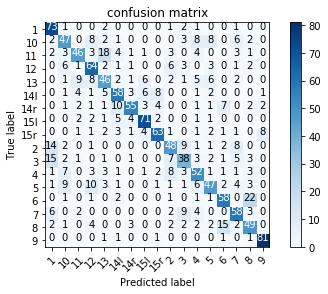

Normalized confusion matrix
[[0.9  0.01 0.   0.   0.02 0.   0.   0.   0.   0.01 0.02 0.01 0.   0.
  0.01 0.   0.  ]
 [0.02 0.54 0.   0.09 0.02 0.01 0.   0.   0.   0.   0.03 0.09 0.09 0.
  0.07 0.02 0.  ]
 [0.02 0.03 0.52 0.03 0.2  0.04 0.01 0.01 0.   0.03 0.   0.04 0.   0.
  0.03 0.01 0.  ]
 [0.   0.07 0.01 0.71 0.02 0.01 0.01 0.   0.   0.07 0.03 0.   0.03 0.
  0.01 0.02 0.  ]
 [0.   0.01 0.1  0.09 0.52 0.02 0.01 0.07 0.   0.02 0.01 0.06 0.07 0.
  0.02 0.   0.  ]
 [0.   0.01 0.04 0.01 0.06 0.64 0.03 0.07 0.09 0.   0.   0.01 0.02 0.
  0.   0.   0.01]
 [0.   0.01 0.02 0.01 0.01 0.11 0.61 0.03 0.04 0.   0.   0.01 0.01 0.08
  0.   0.02 0.02]
 [0.   0.   0.02 0.02 0.01 0.06 0.04 0.8  0.02 0.   0.   0.01 0.01 0.
  0.   0.   0.  ]
 [0.   0.   0.01 0.01 0.02 0.03 0.01 0.04 0.71 0.01 0.   0.01 0.02 0.01
  0.01 0.   0.09]
 [0.16 0.02 0.   0.01 0.   0.   0.   0.   0.   0.56 0.1  0.01 0.01 0.02
  0.09 0.   0.  ]
 [0.19 0.03 0.01 0.   0.01 0.   0.01 0.   0.   0.09 0.48 0.04 0.03 0.01
  0.06 0.04 0.

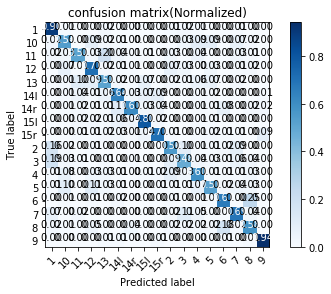

In [44]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
pr.confuse_matrix_plot(y_test,prd,encoder.classes_,title="confusion matrix")

In [157]:
model.predict([X[0].reshape(1,X[0].shape[0],X[0].shape[1])])*100

array([[6.53e+01, 1.58e-02, 2.14e-02, 6.98e-03, 1.79e-02]], dtype=float32)

In [18]:
x=[]
y=[]
for sample_file in os.listdir("Trimed data/")[50:55]:
    if( sample_file!=".ipynb_checkpoints"):
        d= hkl.load("Trimed data/"+sample_file)
        x.extend(d["data"])
        y.extend(d["label"])
        print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Prateep Angchan.hkl
success : prathaueng.hkl
success : Rattana Kunchai.hkl
success : Rattana.hkl
success : Rungnapa.hkl


In [19]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
#X =np.concatenate((XL[:,16:,534:712], XR[:,16:,534:712]), axis=1)
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)


In [20]:
class_num=['1', '10', '5', '6', '9']
X=[t for t,label in zip(X,y_e) if(label in encoder.transform(class_num))]
y_e= [label for label in y_e if(label in encoder.transform(class_num))]

In [21]:
e=preprocessing.LabelEncoder()
e.fit(encoder.inverse_transform(y_e))
y_e=e.transform(encoder.inverse_transform(y_e))

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
print(model.predict(X[0].reshape(1,36,2000)))
print(encoder.inverse_transform(y_e)[0])

[[1.5747990e-03 4.3928670e-04 5.9448033e-05 1.0959737e-02 1.1760382e-03]]
1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

249/249 [==============================] - 0s 858us/step

acc: 66.67%


In [17]:
t1 = hkl.load("week1/test file stream/amnuayx1t0.hkl")
model.predict(t1["data"])

array([[9.5941561e-01, 1.8903340e-05, 1.0808098e-04, 5.2561521e-05,
        7.7275545e-05]], dtype=float32)

In [223]:
model.predict(t1)

array([[8.37e-01, 5.04e-03, 5.06e-03, 3.42e-04, 1.50e-01]], dtype=float32)

Confusion matrix, without normalization
[[29  0  2 19  0]
 [ 8 31 10  0  0]
 [ 2  3 34 10  1]
 [11 10  0 26  3]
 [ 2  2  0  0 46]]


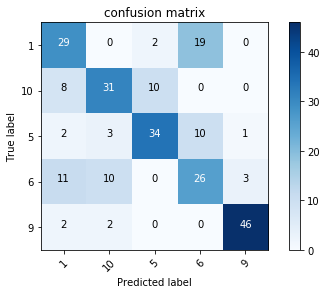

Normalized confusion matrix
[[0.58 0.   0.04 0.38 0.  ]
 [0.16 0.63 0.2  0.   0.  ]
 [0.04 0.06 0.68 0.2  0.02]
 [0.22 0.2  0.   0.52 0.06]
 [0.04 0.04 0.   0.   0.92]]


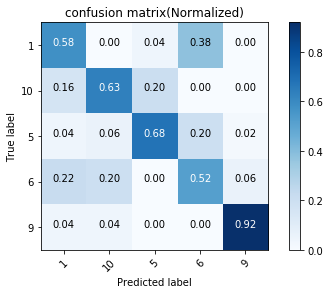

In [28]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X)
pr.confuse_matrix_plot(y_e,prd,e.classes_,title="confusion matrix")

In [12]:
estimator = KerasClassifier(build_fn=build_model2,feature_length=X.shape[2]  ,window_length=X.shape[1],epochs=100, batch_size=500, verbose=1)
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X, y_e)
results50 = cross_val_score(estimator, X, y_e, cv=skf)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app


Epoch 1/100
6487/6487 [==============================] - 31s 5ms/step - loss: 2.7978 - acc: 0.1193
Epoch 2/100
6487/6487 [==============================] - 1s 197us/step - loss: 2.6816 - acc: 0.2164
Epoch 3/100
6487/6487 [==============================] - 1s 199us/step - loss: 2.4967 - acc: 0.2858
Epoch 4/100
6487/6487 [==============================] - 1s 219us/step - loss: 2.2068 - acc: 0.3814
Epoch 5/100
6487/6487 [==============================] - 1s 202us/step - loss: 1.7849 - acc: 0.5164
Epoch 6/100
6487/6487 [==============================] - 1s 202us/step - loss: 1.3568 - acc: 0.6388
Epoch 7/100
6487/6487 [==============================] - 1s 203us/step - loss: 1.0379 - acc: 0.7285
Epoch 8/100
6487/6487 [==============================] - 1s 199us/step - loss: 0.7784 - acc: 0.7993
Epoch 9/100
6487/6487 [==============================] - 1s 202us/step - loss: 0.6063 - acc: 0.8463
Epoch 10/100
6487/6487 [==============================] - 1s 209us/step - loss: 0.4688 - acc: 0.8915


6488/6488 [==============================] - 1s 205us/step - loss: 0.1100 - acc: 0.9667
Epoch 48/100
6488/6488 [==============================] - 1s 200us/step - loss: 0.2144 - acc: 0.9376
Epoch 49/100
6488/6488 [==============================] - 1s 199us/step - loss: 0.2132 - acc: 0.9303
Epoch 50/100
6488/6488 [==============================] - 1s 201us/step - loss: 0.1587 - acc: 0.9524 1s - loss: 0.1512 - 
Epoch 51/100
6488/6488 [==============================] - 1s 201us/step - loss: 0.1158 - acc: 0.9639
Epoch 52/100
6488/6488 [==============================] - 1s 199us/step - loss: 0.0746 - acc: 0.9834
Epoch 53/100
6488/6488 [==============================] - 1s 203us/step - loss: 0.0359 - acc: 0.9937 0s - loss: 0.0371 - acc: 0.99
Epoch 54/100
6488/6488 [==============================] - 1s 208us/step - loss: 0.0185 - acc: 0.9983
Epoch 55/100
6488/6488 [==============================] - 1s 203us/step - loss: 0.0120 - acc: 0.9998 0s - loss: 0.0126 - acc:
Epoch 56/100
6488/6488 [====

6490/6490 [==============================] - 1s 200us/step - loss: 9.0500e-04 - acc: 1.0000
Epoch 89/100
6490/6490 [==============================] - 1s 202us/step - loss: 8.7019e-04 - acc: 1.0000 0s - loss: 8.7851e-04 - acc: 1.000
Epoch 90/100
6490/6490 [==============================] - 1s 202us/step - loss: 8.7022e-04 - acc: 1.0000
Epoch 91/100
6490/6490 [==============================] - 1s 199us/step - loss: 8.7215e-04 - acc: 1.0000
Epoch 92/100
6490/6490 [==============================] - 1s 200us/step - loss: 8.8640e-04 - acc: 1.0000
Epoch 93/100
6490/6490 [==============================] - 1s 198us/step - loss: 8.4077e-04 - acc: 1.0000
Epoch 94/100
6490/6490 [==============================] - 1s 201us/step - loss: 8.6505e-04 - acc: 1.0000 0s - loss: 8.5415e-04 - acc: 1.000
Epoch 95/100
6490/6490 [==============================] - 1s 202us/step - loss: 8.2600e-04 - acc: 1.0000
Epoch 96/100
6490/6490 [==============================] - 1s 200us/step - loss: 7.8563e-04 - acc: 1.000

6493/6493 [==============================] - 1s 201us/step - loss: 0.0159 - acc: 1.0000 0s - loss: 0.0160 - acc: 1.000
Epoch 31/100
6493/6493 [==============================] - 1s 199us/step - loss: 0.0153 - acc: 0.9995 0s - loss: 0.0142 - acc: 0.99 - ETA: 0s - loss: 0.0144 - acc
Epoch 32/100
6493/6493 [==============================] - 1s 201us/step - loss: 0.0135 - acc: 0.9997 0s - loss: 0.0136 - acc
Epoch 33/100
6493/6493 [==============================] - 1s 202us/step - loss: 0.0120 - acc: 1.0000
Epoch 34/100
6493/6493 [==============================] - 1s 200us/step - loss: 0.0097 - acc: 1.0000 0s - loss: 0.0102 - acc:
Epoch 35/100
6493/6493 [==============================] - 1s 203us/step - loss: 0.0098 - acc: 0.9997
Epoch 36/100
6493/6493 [==============================] - 1s 200us/step - loss: 0.0098 - acc: 0.9998
Epoch 37/100
6493/6493 [==============================] - 1s 201us/step - loss: 0.0092 - acc: 0.9998
Epoch 38/100
6493/6493 [==============================] - 1s 199

6495/6495 [==============================] - 1s 206us/step - loss: 0.0067 - acc: 0.9998 0s - loss: 0.0043 - acc: 1.0
Epoch 76/100
6495/6495 [==============================] - 1s 204us/step - loss: 0.0066 - acc: 0.9998
Epoch 77/100
6495/6495 [==============================] - 1s 201us/step - loss: 0.0063 - acc: 0.9998 0s - loss: 0.0100 - acc
Epoch 78/100
6495/6495 [==============================] - 1s 200us/step - loss: 0.0062 - acc: 0.9998 0s - loss: 0.0067 - acc: 0.99
Epoch 79/100
6495/6495 [==============================] - 1s 203us/step - loss: 0.0058 - acc: 0.9998 1s - loss: 0.0199 - acc: 0. - ETA: 0s - loss: 0.0088 - acc:
Epoch 80/100
6495/6495 [==============================] - 1s 199us/step - loss: 0.0056 - acc: 0.9998
Epoch 81/100
6495/6495 [==============================] - 1s 201us/step - loss: 0.0055 - acc: 0.9998
Epoch 82/100
6495/6495 [==============================] - 1s 200us/step - loss: 0.0055 - acc: 0.9998 0s - loss: 0.0076 - acc: 
Epoch 83/100
6495/6495 [============

6500/6500 [==============================] - 1s 200us/step - loss: 0.0746 - acc: 0.9914
Epoch 21/100
6500/6500 [==============================] - 1s 200us/step - loss: 0.0670 - acc: 0.9928 0s - loss: 0.0634 - acc: 
Epoch 22/100
6500/6500 [==============================] - 1s 200us/step - loss: 0.0589 - acc: 0.9917 0s - loss: 0.0571 - acc:
Epoch 23/100
6500/6500 [==============================] - 1s 199us/step - loss: 0.0515 - acc: 0.9935
Epoch 24/100
6500/6500 [==============================] - 1s 203us/step - loss: 0.0473 - acc: 0.9949
Epoch 25/100
6500/6500 [==============================] - 1s 199us/step - loss: 0.0444 - acc: 0.9957
Epoch 26/100
6500/6500 [==============================] - 1s 200us/step - loss: 0.0479 - acc: 0.9945 0s - loss: 0.0450 - acc: 0 - ETA: 0s - loss: 0.0483 - acc: 0.99
Epoch 27/100
6500/6500 [==============================] - 1s 199us/step - loss: 0.0385 - acc: 0.9966 0s - loss: 0.0413 - ac
Epoch 28/100
6500/6500 [==============================] - 1s 200us/

6500/6500 [==============================] - 1s 202us/step - loss: 0.0016 - acc: 1.0000 0s - loss: 0.0016 - acc: 1. - ETA: 0s - loss: 0.0017 - acc: 1.0
Epoch 94/100
6500/6500 [==============================] - 1s 203us/step - loss: 0.0015 - acc: 1.0000
Epoch 95/100
6500/6500 [==============================] - 1s 201us/step - loss: 0.0015 - acc: 1.0000
Epoch 96/100
6500/6500 [==============================] - 1s 200us/step - loss: 0.0014 - acc: 1.0000 0s - loss: 0.0014 - acc: 1
Epoch 97/100
6500/6500 [==============================] - 1s 201us/step - loss: 0.0013 - acc: 1.0000
Epoch 98/100
6500/6500 [==============================] - 1s 202us/step - loss: 0.0014 - acc: 1.0000
Epoch 99/100
6500/6500 [==============================] - 1s 200us/step - loss: 0.0013 - acc: 1.0000
Epoch 100/100
716/716 [==============================] - 1s 796us/step
Epoch 1/100
6501/6501 [==============================] - 3s 423us/step - loss: 2.7959 - acc: 0.1077 1s - loss: 2.8116 - acc: 0
Epoch 2/100
6501/

6503/6503 [==============================] - 1s 202us/step - loss: 1.0460 - acc: 0.6489
Epoch 37/100
6503/6503 [==============================] - 1s 205us/step - loss: 1.0087 - acc: 0.6559
Epoch 38/100
6503/6503 [==============================] - 1s 201us/step - loss: 0.9751 - acc: 0.6812
Epoch 39/100
6503/6503 [==============================] - 1s 200us/step - loss: 1.0291 - acc: 0.6336 0s - loss: 1.0428 - ac
Epoch 40/100
6503/6503 [==============================] - 1s 200us/step - loss: 0.8825 - acc: 0.7003
Epoch 41/100
6503/6503 [==============================] - 1s 204us/step - loss: 0.9362 - acc: 0.6834
Epoch 42/100
6503/6503 [==============================] - 1s 202us/step - loss: 1.0020 - acc: 0.6683
Epoch 43/100
6503/6503 [==============================] - 1s 201us/step - loss: 0.8842 - acc: 0.7091
Epoch 44/100
6503/6503 [==============================] - 1s 206us/step - loss: 0.8832 - acc: 0.7044 0s - loss: 0.9223 - acc:
Epoch 45/100
6503/6503 [==============================] 

In [13]:
print(results50)
print("Baseline: %.2f%% (%.2f%%)" % (results50.mean()*100, results50.std()*100))

[0.90123458 0.94642858 0.92561983 0.8939394  0.8990318  0.91400834
 0.91237831 0.94972067 0.41958043 0.69004206]
Baseline: 84.52% (15.83%)


In [26]:
print(results50)
print("Baseline: %.2f%% (%.2f%%)" % (results50.mean()*100, results50.std()*100))

[0.89261744 0.89112904 0.90444146 0.92442646 0.9135135  0.90748299
 0.89904504 0.90437157 0.93023256 0.89163235]
Baseline: 90.59% (1.28%)


# Final release model

In [48]:
x=[]
y=[]
for sample_file in os.listdir("full data/")[1:50]:
    d= hkl.load("full data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Gulthida.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : Nittaya.hkl
success : onsa.hkl
success : Oranut.hkl
success : Pagapan.hkl
success : petch.hkl
success : Phimjai saensut.hkl
success : Pichaya.hkl
success : Pikool.hkl


In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X_test = np.concatenate((XL[:,16:], XR[:,16:]), axis=1)
y_test = y_e
del(XL,XR)

In [36]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X_train = np.concatenate((XL[:,16:], XR[:,16:]), axis=1)
y_train = y_e
del(XL,XR)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y_e,test_size=0.1,stratify=y_e)

model=build_model(X_train.shape[1],X_train.shape[2])  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 500, nb_epoch = 100)

In [160]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: Error when checking target: expected output_Dense to have shape (5,) but got array with shape (17,)

In [38]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1659/1659 [==============================] - 2s 1ms/step

acc: 43.70%


Confusion matrix, without normalization
[[76  4  2  7  2  0  0  0]
 [10 58 21  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  4 85  4  2  0  0  0]
 [14  1 17 56 12  0  0  0]
 [ 2  1  0  5 89  0  0  0]]


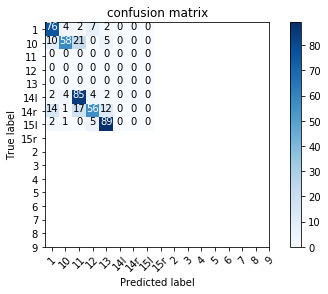

I:\Polycarbon\hand Motion Clasification\Week1\preprocess.py:120: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Normalized confusion matrix
[[0.84 0.04 0.02 0.08 0.02 0.   0.   0.  ]
 [0.11 0.62 0.22 0.   0.05 0.   0.   0.  ]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [ nan  nan  nan  nan  nan  nan  nan  nan]
 [0.02 0.04 0.88 0.04 0.02 0.   0.   0.  ]
 [0.14 0.01 0.17 0.56 0.12 0.   0.   0.  ]
 [0.02 0.01 0.   0.05 0.92 0.   0.   0.  ]]


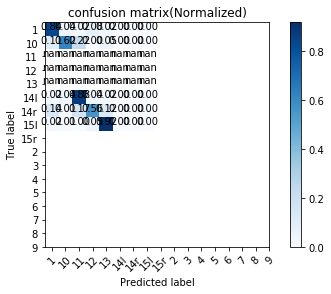

In [100]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X)
pr.confuse_matrix_plot(y_e,prd,encoder.classes_,title="confusion matrix")

In [20]:
from keras.models import model_from_json

In [45]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_pyther-LSTM.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_pyther-LSTM.h5")
print("Saved model to disk")


Saved model to disk


In [119]:
from keras.models import model_from_json
json_file = open("model/model_pyther-20sample-178dp.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model/model_pyther-20sample-178dp.h5")
print("Loaded model from disk")

Loaded model from disk


In [135]:
x=[]
y=[]
for sample_file in os.listdir("full data/")[1:10]:
    d= hkl.load("full data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_et  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_et =[y_et [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl


In [120]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
Xt =np.concatenate((XL[:,16:,534:712], XR[:,16:,534:712]), axis=1)

In [121]:
model=loaded_model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

334/334 [==============================] - 1s 4ms/step

acc: 58.38%
Confusion matrix, without normalization
[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]
 [ 0 12  1  0  1  0  0  0  0  0  0  0  1  0  0  1  3]
 [ 1  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  9]
 [ 0  0  0 17  0  0  0  0  0  1  0  1  1  0  0  0  0]
 [ 0  0  1  0 17  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  1  0  0 10  0  0  3  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0 15  0  0  0  4  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  9  0  0  0  0  0  0  3  0  6]
 [ 1  4  0  0  0  0  0  4 10  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  1  1  0 13  3  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  1  0  1  6 10  0  0  0  0  0  0]
 [ 0  1  0  1  0  1  0  8  0  0  0  8  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  0 10  0  0  0  7]
 [ 0  0  1  0  0  0  1  0  0  0  1  0  0 10  0  0  7]
 [ 5  1  0  0  0  0  0  0  0  0  0  2  0  0 10  1  0]
 [ 8  0  0  1  0  0  0  0  0  0  0  1  0  0  0 10  0]
 [ 0  0  1  0  4  0  1  0  0

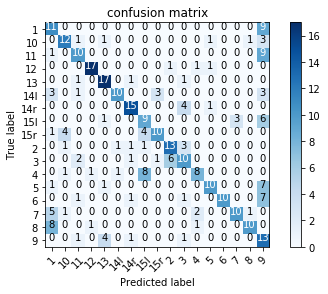

Normalized confusion matrix
[[0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.45]
 [0.   0.63 0.05 0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.05 0.
  0.   0.05 0.16]
 [0.05 0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.45]
 [0.   0.   0.   0.85 0.   0.   0.   0.   0.   0.05 0.   0.05 0.05 0.
  0.   0.   0.  ]
 [0.   0.   0.05 0.   0.85 0.   0.05 0.   0.   0.   0.05 0.   0.   0.
  0.   0.   0.  ]
 [0.15 0.   0.05 0.   0.   0.5  0.   0.   0.15 0.   0.   0.   0.   0.
  0.   0.   0.15]
 [0.   0.   0.   0.   0.   0.   0.75 0.   0.   0.   0.2  0.   0.05 0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.47 0.   0.   0.   0.   0.   0.
  0.16 0.   0.32]
 [0.05 0.21 0.   0.   0.   0.   0.   0.21 0.53 0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.05 0.   0.   0.   0.05 0.05 0.05 0.   0.65 0.15 0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.1  0.   0.   0.   0.05 0.   0.05 0.3  0.5  0.   0.   0.
  0.   0.   0.  ]
 [0.

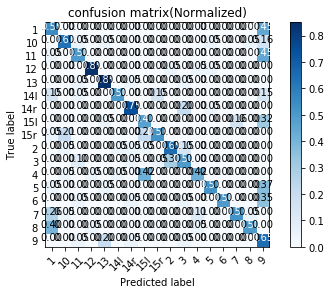

In [127]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([Xt], pd.get_dummies(y_et))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,Xt)
pr.confuse_matrix_plot(y_et,prd,encoder.classes_,title="confusion matrix")

In [35]:
v=[y for e,v in zip(x,y) if(e[0].size!=0)]
u=[e for e in x if(e[0].size!=0)]

In [61]:
Xt.shape

(334, 36, 178)

In [128]:
def preprocess(L,R,batch_size):
    l=sequence.pad_sequences(L, padding="post",maxlen=batch_size,dtype='float32')
    r=sequence.pad_sequences(R, padding="post",maxlen=batch_size,dtype='float32')
    return np.concatenate((l, r), axis=0)
    

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
from scipy import stats
batch_size=178
yy=[]
vv=[]
for record,label in zip(x,y):
    ans=[]
    
    if(record[0].shape[1]!=0):
        print("label : "+label)
        for index in range(0,record[0].shape[1],batch_size):
            Lbatch = record[0][:,index:min(index+batch_size,record[0].shape[1])]
            Rbatch = record[1][:,index:min(index+batch_size,record[1].shape[1])]
            batch=preprocess(Lbatch[16:],Rbatch[16:],batch_size)
            batch=batch.reshape(1,batch.shape[0],batch.shape[1])
            ans.append(get_predict(model,batch)[0])
            #print(encoder.inverse_transform(get_predict(model,batch)))
        ge,count = stats.mode(ans)
        yy.append(label)
        vv.append(encoder.inverse_transform(ge)[0])
        print("ans : "+str(encoder.inverse_transform(ge))+" count : "+str(count[0])+"/"+str(len(ans))+"\n")
    

label : 1
ans : ['1'] count : 6/6

label : 1
ans : ['2'] count : 4/9

label : 1
ans : ['1'] count : 5/9

label : 1
ans : ['1'] count : 4/9

label : 1
ans : ['2'] count : 5/10

label : 1
ans : ['1'] count : 4/9

label : 1
ans : ['2'] count : 4/10

label : 1
ans : ['3'] count : 6/10

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 5/11

label : 1
ans : ['3'] count : 5/10

label : 2
ans : ['3'] count : 5/9

label : 2
ans : ['3'] count : 8/9

label : 2
ans : ['3'] count : 6/8

label : 2
ans : ['3'] count : 11/12

label : 2
ans : ['3'] count : 10/11

label : 2
ans : ['3'] count : 9/10

label : 2
ans : ['3'] count : 9/9

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 10/11

label : 2
ans : ['3'] count : 10/13

label : 2
ans : ['3'] count : 10/11

label : 3
ans : ['3'] count : 10/11

label : 3
ans : ['1'] count : 4/9

label : 3
ans : ['4'] count : 6/13

label : 3
ans : ['1'] count : 8/12

label : 3
ans : ['4'] count : 6/12

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/11

label : 3
ans : ['3'] count : 6/13

label : 3
ans : ['4'] count : 9/13

label : 3
ans : ['4'] count : 11/13

label : 3
ans : ['4'] count : 7/13

label : 4
ans : ['8'] count : 4/13

label : 4
ans : ['5'] count : 4/8

label : 4
ans : ['6'] count : 5/10

label : 4
ans : ['6'] count : 4/10

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 5/10

label : 4
ans : ['5'] count : 4/11

label : 4
ans : ['5'] count : 3/11

label : 4
ans : ['6'] count : 4/10

label : 4
ans : ['6'] count : 3/12

label : 4
ans : ['3'] count : 2/10

label : 5
ans : ['6'] count : 5/10

label : 5
ans : ['6'] count : 6/12

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 7/13

label : 5
ans : ['6'] count : 7/13

label : 5
ans : ['6'] count : 5/11

label : 5
ans : ['4'] count : 6/13

label : 5
ans : ['6'] count : 9/14

label : 5
ans : ['6'] count : 10/14

label : 5
ans : ['6'] count : 12/16

label : 5
ans : ['6'] count : 8/13

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 9/12

label : 6
ans : ['7'] count : 10/13

label : 6
ans : ['7'] count : 9/15

label : 6
ans : ['7'] count : 8/13

label : 6
ans : ['7'] count : 9/15

label : 6
ans : ['7'] count : 10/13

label : 6
ans : ['7'] count : 9/12

label : 6
ans : ['7'] count : 8/12

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 8/13

label : 6
ans : ['7'] count : 10/14

label : 7
ans : ['7'] count : 7/12

label : 7
ans : ['8'] count : 9/12

label : 7
ans : ['8'] count : 10/13

label : 7
ans : ['8'] count : 12/13

label : 7
ans : ['8'] count : 13/14

label : 7
ans : ['8'] count : 13/14

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 13/13

label : 7
ans : ['8'] count : 12/13

label : 7
ans : ['8'] count : 12/13

label : 7
ans : ['8'] count : 13/14

label : 8
ans : ['8'] count : 5/8

label : 8
ans : ['8'] count : 3/8

label : 8
ans : ['8'] count : 3/8

label : 8
ans : ['6'] count : 4/10

label : 8
ans : ['10'] count : 3/9

label : 8
ans : ['10'] count : 5/10

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 5/10

label : 8
ans : ['10'] count : 6/11

label : 8
ans : ['10'] count : 6/11

label : 8
ans : ['10'] count : 4/10

label : 9
ans : ['11'] count : 5/9

label : 9
ans : ['10'] count : 4/10

label : 9
ans : ['11'] count : 4/10

label : 9
ans : ['11'] count : 5/10

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 7/13

label : 9
ans : ['11'] count : 9/12

label : 9
ans : ['11'] count : 12/14

label : 9
ans : ['11'] count : 10/12

label : 9
ans : ['11'] count : 9/11

label : 9
ans : ['1'] count : 4/11

label : 10
ans : ['11'] count : 5/12

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 4/12

label : 10
ans : ['12'] count : 5/12

label : 10
ans : ['11'] count : 6/13

label : 10
ans : ['12'] count : 5/14

label : 10
ans : ['12'] count : 5/13

label : 10
ans : ['11'] count : 4/12

label : 10
ans : ['12'] count : 5/14

label : 10
ans : ['11'] count : 6/13

label : 10
ans : ['12'] count : 5/13

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 3/11

label : 11
ans : ['1'] count : 4/11

label : 11
ans : ['1'] count : 4/12

label : 11
ans : ['1'] count : 5/12

label : 11
ans : ['13'] count : 5/15

label : 11
ans : ['13'] count : 5/12

label : 11
ans : ['13'] count : 6/12

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 5/15

label : 11
ans : ['13'] count : 7/16

label : 11
ans : ['13'] count : 7/14

label : 12
ans : ['11'] count : 5/12

label : 12
ans : ['14l'] count : 9/15

label : 12
ans : ['14l'] count : 10/14

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 6/14

label : 12
ans : ['14l'] count : 7/14

label : 12
ans : ['14l'] count : 8/17

label : 12
ans : ['14l'] count : 8/15

label : 12
ans : ['14l'] count : 7/15

label : 12
ans : ['14l'] count : 5/14

label : 12
ans : ['14l'] count : 9/15

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 5/14

label : 13
ans : ['11'] count : 7/14

label : 13
ans : ['11'] count : 6/15

label : 13
ans : ['11'] count : 6/15

label : 13
ans : ['14r'] count : 5/12

label : 13
ans : ['6'] count : 6/14

label : 13
ans : ['14r'] count : 4/13

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 5/16

label : 13
ans : ['6'] count : 5/15

label : 13
ans : ['15l'] count : 4/14

label : 14l
ans : ['8'] count : 7/15

label : 14l
ans : ['15l'] count : 5/15

label : 14l
ans : ['15l'] count : 5/16

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15l'] count : 8/16

label : 14l
ans : ['15l'] count : 5/16

label : 14l
ans : ['15l'] count : 7/14

label : 14l
ans : ['15l'] count : 7/14

label : 14l
ans : ['15r'] count : 7/15

label : 14l
ans : ['15r'] count : 8/17

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15r'] count : 6/15

label : 14r
ans : ['15r'] count : 7/16

label : 14r
ans : ['14l'] count : 8/17

label : 14r
ans : ['15r'] count : 6/16

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 7/17

label : 14r
ans : ['15r'] count : 5/15

label : 14r
ans : ['13'] count : 5/15

label : 14r
ans : ['8'] count : 7/15

label : 14r
ans : ['1'] count : 8/9

label : 14r
ans : ['1'] count : 7/8

label : 14r
ans : ['1'] count : 5/9

label : 15l
ans : ['1'] count : 6/6

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 10/11

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 6/10

label : 15l
ans : ['1'] count : 7/8

label : 15l
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 4/10

label : 15l
ans : ['2'] count : 4/9

label : 15l
ans : ['3'] count : 5/9

label : 15r
ans : ['3'] count : 6/10

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 4/10

label : 15r
ans : ['2'] count : 4/10

label : 15r
ans : ['3'] count : 4/10

label : 15r
ans : ['2'] count : 4/10

label : 15r
ans : ['3'] count : 5/10

label : 15r
ans : ['2'] count : 5/11

label : 15r
ans : ['3'] count : 10/10

label : 15r
ans : ['3'] count : 10/10

label : 15r
ans : ['3'] count : 10/10

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 7/10

label : 1
ans : ['3'] count : 10/11

label : 1
ans : ['3'] count : 8/11

label : 1
ans : ['3'] count : 9/10

label : 1
ans : ['3'] count : 9/10

label : 1
ans : ['3'] count : 9/10

label : 1
ans : ['3'] count : 10/10

label : 1
ans : ['4'] count : 6/11

label : 1
ans : ['4'] count : 8/11

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 7/10

label : 2
ans : ['4'] count : 6/11

label : 2
ans : ['4'] count : 7/10

label : 2
ans : ['4'] count : 4/11

label : 2
ans : ['4'] count : 7/12

label : 2
ans : ['4'] count : 6/11

label : 2
ans : ['4'] count : 5/11

label : 2
ans : ['4'] count : 7/11

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 5/10

label : 2
ans : ['5'] count : 5/11

label : 2
ans : ['5'] count : 5/11

label : 3
ans : ['5'] count : 5/11

label : 3
ans : ['5'] count : 5/11

label : 3
ans : ['3'] count : 5/11

label : 3
ans : ['5'] count : 5/11

label : 3
ans : ['5'] count : 6/10

label : 3
ans : ['5'] count : 5/10

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 5/10

label : 3
ans : ['3'] count : 3/10

label : 3
ans : ['6'] count : 4/10

label : 3
ans : ['6'] count : 4/11

label : 4
ans : ['1'] count : 4/10

label : 4
ans : ['6'] count : 5/11

label : 4
ans : ['1'] count : 4/11

label : 4
ans : ['6'] count : 4/10

label : 4
ans : ['1'] count : 4/11

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/10

label : 4
ans : ['6'] count : 4/11

label : 4
ans : ['1'] count : 4/11

label : 4
ans : ['7'] count : 5/12

label : 4
ans : ['7'] count : 6/11

label : 5
ans : ['7'] count : 5/11

label : 5
ans : ['7'] count : 6/11

label : 5
ans : ['7'] count : 6/11

label : 5
ans : ['7'] count : 6/11

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 6/11

label : 5
ans : ['7'] count : 6/11

label : 5
ans : ['3'] count : 5/11

label : 5
ans : ['8'] count : 3/12

label : 5
ans : ['8'] count : 9/10

label : 5
ans : ['8'] count : 6/11

label : 6
ans : ['3'] count : 5/11

label : 6
ans : ['3'] count : 4/11

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 5/11

label : 6
ans : ['3'] count : 4/11

label : 6
ans : ['8'] count : 5/11

label : 6
ans : ['8'] count : 6/11

label : 6
ans : ['8'] count : 5/11

label : 6
ans : ['10'] count : 4/11

label : 6
ans : ['9'] count : 5/11

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15l'] count : 4/11

label : 7
ans : ['9'] count : 5/10

label : 7
ans : ['9'] count : 5/11

label : 7
ans : ['9'] count : 3/10

label : 7
ans : ['10'] count : 3/9

label : 7
ans : ['9'] count : 5/10

label : 7
ans : ['10'] count : 4/10

label : 7
ans : ['1'] count : 3/10

label : 7
ans : ['10'] count : 4/10

label : 7
ans : ['10'] count : 8/9

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 9/9

label : 8
ans : ['10'] count : 6/9

label : 8
ans : ['10'] count : 8/9

label : 8
ans : ['10'] count : 7/9

label : 8
ans : ['10'] count : 7/9

label : 8
ans : ['10'] count : 8/9

label : 8
ans : ['10'] count : 9/9

label : 8
ans : ['10'] count : 5/10

label : 8
ans : ['11'] count : 7/10

label : 8
ans : ['11'] count : 9/9

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 8/10

label : 9
ans : ['11'] count : 6/10

label : 9
ans : ['11'] count : 7/11

label : 9
ans : ['11'] count : 9/10

label : 9
ans : ['11'] count : 8/10

label : 9
ans : ['11'] count : 9/11

label : 9
ans : ['11'] count : 8/10

label : 9
ans : ['11'] count : 8/11

label : 9
ans : ['7'] count : 4/11

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 5/11

label : 9
ans : ['11'] count : 4/10

label : 10
ans : ['11'] count : 4/10

label : 10
ans : ['12'] count : 4/10

label : 10
ans : ['12'] count : 4/10

label : 10
ans : ['12'] count : 5/11

label : 10
ans : ['14l'] count : 4/10

label : 10
ans : ['12'] count : 4/11

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['12'] count : 6/10

label : 10
ans : ['13'] count : 5/11

label : 10
ans : ['13'] count : 5/10

label : 10
ans : ['13'] count : 5/10

label : 11
ans : ['13'] count : 5/10

label : 11
ans : ['13'] count : 5/10

label : 11
ans : ['13'] count : 5/10

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 5/10

label : 11
ans : ['13'] count : 4/11

label : 11
ans : ['13'] count : 5/11

label : 11
ans : ['13'] count : 5/11

label : 11
ans : ['8'] count : 4/9

label : 11
ans : ['14l'] count : 3/9

label : 11
ans : ['14l'] count : 3/10

label : 12
ans : ['14l'] count : 4/10

label : 12
ans : ['14l'] count : 4/11

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 4/11

label : 12
ans : ['14l'] count : 5/10

label : 12
ans : ['14l'] count : 4/11

label : 12
ans : ['11'] count : 4/11

label : 12
ans : ['14l'] count : 7/12

label : 12
ans : ['11'] count : 5/11

label : 12
ans : ['11'] count : 7/12

label : 12
ans : ['11'] count : 6/12

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 6/11

label : 13
ans : ['14r'] count : 6/11

label : 13
ans : ['14r'] count : 7/11

label : 13
ans : ['14r'] count : 6/12

label : 13
ans : ['14r'] count : 7/11

label : 13
ans : ['14r'] count : 8/10

label : 13
ans : ['14r'] count : 10/11

label : 13
ans : ['14r'] count : 5/10

label : 13
ans : ['14r'] count : 5/11

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 5/11

label : 14l
ans : ['14r'] count : 5/11

label : 14l
ans : ['14r'] count : 5/11

label : 14l
ans : ['14r'] count : 5/12

label : 14l
ans : ['15l'] count : 5/11

label : 14l
ans : ['14r'] count : 5/10

label : 14l
ans : ['15l'] count : 6/11

label : 14l
ans : ['15l'] count : 5/11

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 6/12

label : 14l
ans : ['14r'] count : 5/11

label : 14l
ans : ['14r'] count : 4/10

label : 14r
ans : ['14r'] count : 4/10

label : 14r
ans : ['14r'] count : 4/11

label : 14r
ans : ['14r'] count : 4/10

label : 14r
ans : ['14r'] count : 5/10

label : 14r
ans : ['14r'] count : 5/10

label : 14r
ans : ['14r'] count : 5/10

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 5/11

label : 14r
ans : ['1'] count : 10/11

label : 14r
ans : ['1'] count : 13/13

label : 14r
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 9/10

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 7/8

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 4/13

label : 15l
ans : ['9'] count : 4/11

label : 15l
ans : ['9'] count : 5/11

label : 15r
ans : ['9'] count : 5/12

label : 15r
ans : ['9'] count : 5/11

label : 15r
ans : ['2'] count : 5/11

label : 15r
ans : ['2'] count : 5/11

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 5/12

label : 15r
ans : ['9'] count : 6/11

label : 15r
ans : ['2'] count : 5/12

label : 15r
ans : ['3'] count : 6/13

label : 15r
ans : ['3'] count : 5/10

label : 15r
ans : ['3'] count : 6/12

label : 1
ans : ['3'] count : 7/12

label : 1
ans : ['3'] count : 7/13

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 7/13

label : 1
ans : ['1'] count : 7/12

label : 1
ans : ['3'] count : 5/12

label : 1
ans : ['3'] count : 5/12

label : 1
ans : ['3'] count : 11/13

label : 1
ans : ['1'] count : 6/15

label : 1
ans : ['4'] count : 6/13

label : 1
ans : ['4'] count : 6/12

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 5/12

label : 2
ans : ['4'] count : 6/12

label : 2
ans : ['4'] count : 8/13

label : 2
ans : ['4'] count : 7/12

label : 2
ans : ['4'] count : 6/13

label : 2
ans : ['4'] count : 6/13

label : 2
ans : ['4'] count : 7/14

label : 2
ans : ['1'] count : 5/13

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/13

label : 2
ans : ['10'] count : 5/12

label : 3
ans : ['5'] count : 5/12

label : 3
ans : ['5'] count : 4/13

label : 3
ans : ['10'] count : 6/12

label : 3
ans : ['10'] count : 7/13

label : 3
ans : ['10'] count : 7/14

label : 3
ans : ['1'] count : 5/14

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/13

label : 3
ans : ['9'] count : 5/16

label : 3
ans : ['6'] count : 5/15

label : 3
ans : ['6'] count : 6/13

label : 4
ans : ['1'] count : 5/14

label : 4
ans : ['6'] count : 6/15

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 7/14

label : 4
ans : ['9'] count : 6/14

label : 4
ans : ['6'] count : 7/15

label : 4
ans : ['6'] count : 7/17

label : 4
ans : ['7'] count : 8/14

label : 4
ans : ['7'] count : 6/14

label : 4
ans : ['7'] count : 6/14

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 8/14

label : 5
ans : ['7'] count : 10/16

label : 5
ans : ['7'] count : 13/17

label : 5
ans : ['9'] count : 6/14

label : 5
ans : ['9'] count : 8/15

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 9/15

label : 5
ans : ['9'] count : 5/14

label : 5
ans : ['8'] count : 9/16

label : 5
ans : ['8'] count : 12/14

label : 5
ans : ['8'] count : 7/13

label : 5
ans : ['8'] count : 12/13

label : 6
ans : ['8'] count : 6/14

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/14

label : 6
ans : ['8'] count : 7/14

label : 6
ans : ['8'] count : 7/12

label : 6
ans : ['9'] count : 6/13

label : 6
ans : ['8'] count : 5/13

label : 6
ans : ['9'] count : 6/16

label : 6
ans : ['9'] count : 6/12

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 4/12

label : 6
ans : ['8'] count : 5/12

label : 7
ans : ['9'] count : 5/13

label : 7
ans : ['9'] count : 6/14

label : 7
ans : ['9'] count : 7/13

label : 7
ans : ['9'] count : 6/13

label : 7
ans : ['9'] count : 6/12

label : 7
ans : ['9'] count : 6/13

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 8/15

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 6/12

label : 7
ans : ['10'] count : 7/13

label : 8
ans : ['9'] count : 6/12

label : 8
ans : ['9'] count : 6/13

label : 8
ans : ['10'] count : 5/13

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['9'] count : 6/15

label : 8
ans : ['11'] count : 6/12

label : 8
ans : ['11'] count : 5/11

label : 8
ans : ['11'] count : 5/11

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 6/11

label : 9
ans : ['11'] count : 8/12

label : 9
ans : ['11'] count : 7/12

label : 9
ans : ['11'] count : 6/12

label : 9
ans : ['11'] count : 9/13

label : 9
ans : ['11'] count : 8/13

label : 9
ans : ['1'] count : 4/16

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['12'] count : 5/15

label : 9
ans : ['12'] count : 4/13

label : 9
ans : ['12'] count : 4/13

label : 10
ans : ['12'] count : 4/13

label : 10
ans : ['9'] count : 4/13

label : 10
ans : ['12'] count : 5/13

label : 10
ans : ['12'] count : 5/13

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['12'] count : 4/13

label : 10
ans : ['9'] count : 4/13

label : 10
ans : ['13'] count : 6/16

label : 10
ans : ['13'] count : 5/13

label : 10
ans : ['1'] count : 5/14

label : 10
ans : ['9'] count : 6/14

label : 11
ans : ['13'] count : 6/14

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 7/14

label : 11
ans : ['13'] count : 5/12

label : 11
ans : ['13'] count : 5/13

label : 11
ans : ['9'] count : 6/14

label : 11
ans : ['9'] count : 7/15

label : 11
ans : ['9'] count : 7/15

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 7/15

label : 11
ans : ['9'] count : 7/15

label : 11
ans : ['9'] count : 7/14

label : 12
ans : ['14l'] count : 5/13

label : 12
ans : ['9'] count : 6/15

label : 12
ans : ['14l'] count : 7/16

label : 12
ans : ['9'] count : 6/14

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 6/13

label : 12
ans : ['9'] count : 6/14

label : 12
ans : ['9'] count : 7/16

label : 12
ans : ['14r'] count : 5/14

label : 12
ans : ['14r'] count : 5/13

label : 12
ans : ['14r'] count : 6/14

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 4/12

label : 13
ans : ['9'] count : 5/13

label : 13
ans : ['9'] count : 4/13

label : 13
ans : ['14r'] count : 5/13

label : 13
ans : ['14r'] count : 5/14

label : 13
ans : ['14r'] count : 6/14

label : 13
ans : ['9'] count : 8/15

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 4/13

label : 13
ans : ['9'] count : 5/13

label : 13
ans : ['9'] count : 5/13

label : 14l
ans : ['15l'] count : 5/12

label : 14l
ans : ['9'] count : 5/13

label : 14l
ans : ['9'] count : 6/14

label : 14l
ans : ['9'] count : 5/13

label : 14l
ans : ['9'] count : 7/13

label : 14l
ans : ['9'] count : 6/14

label : 14l
ans : ['9'] count : 6/14

label : 14l
ans : ['9'] count : 6/13

label : 14l
ans : ['9'] count : 5/12

label : 14l
ans : ['9'] count : 5/13

label : 14r
ans : ['15r'] count : 5/12

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 6/13

label : 14r
ans : ['15r'] count : 5/13

label : 14r
ans : ['9'] count : 6/13

label : 14r
ans : ['9'] count : 6/13

label : 14r
ans : ['9'] count : 6/13

label : 14r
ans : ['1'] count : 12/12

label : 14r
ans : ['1'] count : 8/9

label : 14r
ans : ['1'] count : 10/10

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/10

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/9

label : 15l
ans : ['1'] count : 9/10

label : 15l
ans : ['2'] count : 5/15

label : 15l
ans : ['7'] count : 7/17

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 8/16

label : 15l
ans : ['2'] count : 6/16

label : 15r
ans : ['7'] count : 7/15

label : 15r
ans : ['2'] count : 5/14

label : 15r
ans : ['2'] count : 5/15

label : 15r
ans : ['2'] count : 5/15

label : 15r
ans : ['2'] count : 6/15

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 5/16

label : 15r
ans : ['3'] count : 8/15

label : 15r
ans : ['3'] count : 9/14

label : 15r
ans : ['3'] count : 7/14

label : 15r
ans : ['3'] count : 9/15

label : 1
ans : ['3'] count : 9/15

label : 1
ans : ['3'] count : 11/14

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 11/14

label : 1
ans : ['3'] count : 10/14

label : 1
ans : ['3'] count : 7/15

label : 1
ans : ['4'] count : 6/13

label : 1
ans : ['4'] count : 6/13

label : 1
ans : ['4'] count : 6/14

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 5/13

label : 1
ans : ['4'] count : 5/12

label : 2
ans : ['9'] count : 6/13

label : 2
ans : ['4'] count : 6/13

label : 2
ans : ['4'] count : 6/12

label : 2
ans : ['9'] count : 7/12

label : 2
ans : ['5'] count : 5/13

label : 2
ans : ['9'] count : 5/13

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 5/11

label : 2
ans : ['5'] count : 5/11

label : 2
ans : ['5'] count : 4/11

label : 2
ans : ['5'] count : 4/11

label : 3
ans : ['5'] count : 5/11

label : 3
ans : ['5'] count : 6/12

label : 3
ans : ['9'] count : 4/11

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 9/17

label : 3
ans : ['6'] count : 6/14

label : 3
ans : ['6'] count : 5/12

label : 3
ans : ['6'] count : 5/12

label : 3
ans : ['6'] count : 5/13

label : 3
ans : ['6'] count : 6/13

label : 3
ans : ['6'] count : 9/13

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 6/12

label : 4
ans : ['6'] count : 5/12

label : 4
ans : ['9'] count : 6/13

label : 4
ans : ['7'] count : 6/14

label : 4
ans : ['7'] count : 4/11

label : 4
ans : ['9'] count : 5/11

label : 4
ans : ['9'] count : 7/12

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 5/12

label : 4
ans : ['7'] count : 5/12

label : 4
ans : ['9'] count : 6/12

label : 5
ans : ['7'] count : 4/12

label : 5
ans : ['9'] count : 6/12

label : 5
ans : ['7'] count : 7/13

label : 5
ans : ['9'] count : 8/17

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/12

label : 5
ans : ['8'] count : 6/12

label : 5
ans : ['8'] count : 5/12

label : 5
ans : ['8'] count : 6/11

label : 5
ans : ['8'] count : 5/11

label : 5
ans : ['8'] count : 4/11

label : 6
ans : ['9'] count : 5/12

label : 6
ans : ['8'] count : 5/12

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/12

label : 6
ans : ['9'] count : 13/17

label : 6
ans : ['9'] count : 6/13

label : 6
ans : ['9'] count : 5/12

label : 6
ans : ['9'] count : 6/13

label : 6
ans : ['9'] count : 5/13

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 5/13

label : 6
ans : ['9'] count : 5/13

label : 7
ans : ['9'] count : 5/13

label : 7
ans : ['8'] count : 4/12

label : 7
ans : ['8'] count : 4/12

label : 7
ans : ['10'] count : 6/17

label : 7
ans : ['9'] count : 7/14

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 6/12

label : 7
ans : ['9'] count : 7/13

label : 7
ans : ['9'] count : 6/12

label : 7
ans : ['9'] count : 6/13

label : 7
ans : ['10'] count : 6/15

label : 8
ans : ['10'] count : 11/12

label : 8
ans : ['10'] count : 11/13

label : 8
ans : ['10'] count : 12/14

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 7/14

label : 8
ans : ['10'] count : 6/11

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 7/13

label : 8
ans : ['11'] count : 6/12

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 8/14

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/12

label : 9
ans : ['11'] count : 7/13

label : 9
ans : ['10'] count : 7/13

label : 9
ans : ['1'] count : 5/13

label : 9
ans : ['10'] count : 6/11

label : 9
ans : ['12'] count : 5/11

label : 9
ans : ['10'] count : 5/11

label : 9
ans : ['10'] count : 6/12

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/12

label : 9
ans : ['10'] count : 5/11

label : 10
ans : ['10'] count : 6/12

label : 10
ans : ['10'] count : 5/12

label : 10
ans : ['10'] count : 6/12

label : 10
ans : ['10'] count : 7/15

label : 10
ans : ['10'] count : 6/12

label : 10
ans : ['10'] count : 4/12

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 5/11

label : 10
ans : ['10'] count : 7/13

label : 10
ans : ['13'] count : 5/12

label : 10
ans : ['10'] count : 6/12

label : 11
ans : ['10'] count : 6/12

label : 11
ans : ['10'] count : 6/11

label : 11
ans : ['10'] count : 7/13

label : 11
ans : ['10'] count : 6/14

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 5/12

label : 11
ans : ['10'] count : 4/11

label : 11
ans : ['10'] count : 4/12

label : 11
ans : ['10'] count : 5/12

label : 11
ans : ['10'] count : 5/13

label : 11
ans : ['10'] count : 5/12

label : 12
ans : ['10'] count : 6/12

label : 12
ans : ['10'] count : 5/12

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 5/13

label : 12
ans : ['10'] count : 5/12

label : 12
ans : ['10'] count : 5/11

label : 12
ans : ['10'] count : 5/11

label : 12
ans : ['14r'] count : 5/12

label : 12
ans : ['10'] count : 5/11

label : 12
ans : ['14r'] count : 6/13

label : 12
ans : ['14r'] count : 5/12

label : 13
ans : ['1'] count : 4/12

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/13

label : 13
ans : ['1'] count : 5/14

label : 13
ans : ['15l'] count : 5/12

label : 13
ans : ['15l'] count : 6/11

label : 13
ans : ['15l'] count : 5/12

label : 13
ans : ['15l'] count : 6/11

label : 13
ans : ['15l'] count : 5/12

label : 13
ans : ['15l'] count : 6/12

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15l'] count : 6/12

label : 14l
ans : ['15l'] count : 5/12

label : 14l
ans : ['15l'] count : 5/12

label : 14l
ans : ['4'] count : 6/14

label : 14l
ans : ['4'] count : 6/13

label : 14l
ans : ['1'] count : 6/12

label : 14l
ans : ['4'] count : 5/12

label : 14l
ans : ['15r'] count : 5/12

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/12

label : 14l
ans : ['1'] count : 5/12

label : 14l
ans : ['1'] count : 5/12

label : 14r
ans : ['15r'] count : 4/12

label : 14r
ans : ['15r'] count : 5/12

label : 14r
ans : ['1'] count : 6/9

label : 14r
ans : ['1'] count : 11/11

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 12/12

label : 14r
ans : ['1'] count : 9/10

label : 14r
ans : ['1'] count : 11/11

label : 14r
ans : ['1'] count : 12/12

label : 14r
ans : ['1'] count : 10/10

label : 14r
ans : ['1'] count : 13/13

label : 15l
ans : ['1'] count : 11/11

label : 15l
ans : ['1'] count : 10/12

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 8/16

label : 15l
ans : ['15r'] count : 5/11

label : 15l
ans : ['15r'] count : 5/12

label : 15l
ans : ['2'] count : 6/13

label : 15l
ans : ['2'] count : 6/13

label : 15l
ans : ['2'] count : 6/13

label : 15l
ans : ['1'] count : 5/11

label : 15l
ans : ['1'] count : 7/13

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 6/12

label : 15r
ans : ['1'] count : 6/13

label : 15r
ans : ['3'] count : 11/14

label : 15r
ans : ['3'] count : 10/11

label : 15r
ans : ['3'] count : 11/12

label : 15r
ans : ['3'] count : 5/12

label : 15r
ans : ['3'] count : 10/12

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 11/13

label : 15r
ans : ['3'] count : 7/10

label : 15r
ans : ['3'] count : 14/14

label : 1
ans : ['3'] count : 8/12

label : 1
ans : ['3'] count : 9/11

label : 1
ans : ['1'] count : 6/13

label : 1
ans : ['4'] count : 7/13

label : 1
ans : ['4'] count : 7/13

label : 1
ans : ['1'] count : 6/13

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 6/13

label : 1
ans : ['4'] count : 7/13

label : 1
ans : ['4'] count : 8/14

label : 1
ans : ['4'] count : 7/13

label : 2
ans : ['4'] count : 7/14

label : 2
ans : ['1'] count : 7/14

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 6/13

label : 2
ans : ['5'] count : 6/14

label : 2
ans : ['5'] count : 8/14

label : 2
ans : ['5'] count : 6/13

label : 2
ans : ['5'] count : 6/13

label : 2
ans : ['5'] count : 6/13

label : 2
ans : ['5'] count : 7/14

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 7/13

label : 3
ans : ['1'] count : 6/14

label : 3
ans : ['5'] count : 8/14

label : 3
ans : ['6'] count : 5/11

label : 3
ans : ['6'] count : 6/12

label : 3
ans : ['6'] count : 6/12

label : 3
ans : ['6'] count : 6/12

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 9/13

label : 3
ans : ['6'] count : 10/14

label : 3
ans : ['6'] count : 9/14

label : 3
ans : ['6'] count : 7/12

label : 4
ans : ['6'] count : 8/13

label : 4
ans : ['6'] count : 7/11

label : 4
ans : ['7'] count : 6/14

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 7/13

label : 4
ans : ['7'] count : 7/13

label : 4
ans : ['7'] count : 7/13

label : 4
ans : ['7'] count : 7/13

label : 4
ans : ['7'] count : 6/12

label : 4
ans : ['7'] count : 7/14

label : 4
ans : ['1'] count : 5/12

label : 5
ans : ['1'] count : 5/12

label : 5
ans : ['7'] count : 8/14

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/13

label : 5
ans : ['8'] count : 7/13

label : 5
ans : ['8'] count : 6/13

label : 5
ans : ['8'] count : 8/14

label : 5
ans : ['8'] count : 7/14

label : 5
ans : ['8'] count : 7/13

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 8/13

label : 5
ans : ['9'] count : 7/13

label : 6
ans : ['9'] count : 6/12

label : 6
ans : ['9'] count : 6/12

label : 6
ans : ['9'] count : 6/13

label : 6
ans : ['9'] count : 6/12

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 6/12

label : 6
ans : ['9'] count : 8/13

label : 6
ans : ['9'] count : 7/14

label : 6
ans : ['9'] count : 12/15

label : 6
ans : ['9'] count : 11/14

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 12/15

label : 7
ans : ['9'] count : 10/14

label : 7
ans : ['9'] count : 9/14

label : 7
ans : ['10'] count : 7/12

label : 7
ans : ['10'] count : 7/13

label : 7
ans : ['9'] count : 7/14

label : 7
ans : ['10'] count : 7/13

label : 7
ans : ['10'] count : 8/14

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 7/14

label : 7
ans : ['10'] count : 7/13

label : 7
ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['10'] count : 7/13

label : 8
ans : ['11'] count : 7/15

label : 8
ans : ['11'] count : 6/13

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 7/14

label : 8
ans : ['11'] count : 7/14

label : 8
ans : ['11'] count : 6/14

label : 8
ans : ['1'] count : 5/13

label : 8
ans : ['1'] count : 7/14

label : 8
ans : ['11'] count : 7/14

label : 9
ans : ['1'] count : 5/13

label : 9
ans : ['11'] count : 7/13

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/13

label : 9
ans : ['1'] count : 6/12

label : 9
ans : ['1'] count : 6/14

label : 9
ans : ['12'] count : 7/13

label : 9
ans : ['1'] count : 7/15

label : 9
ans : ['12'] count : 7/14

label : 9
ans : ['12'] count : 7/13

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/12

label : 10
ans : ['1'] count : 5/12

label : 10
ans : ['1'] count : 6/13

label : 10
ans : ['13'] count : 7/12

label : 10
ans : ['13'] count : 7/14

label : 10
ans : ['1'] count : 6/15

label : 10
ans : ['13'] count : 8/14

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 7/14

label : 10
ans : ['13'] count : 7/14

label : 10
ans : ['1'] count : 5/12

label : 10
ans : ['13'] count : 6/14

label : 11
ans : ['13'] count : 6/10

label : 11
ans : ['13'] count : 7/13

label : 11
ans : ['13'] count : 6/13

label : 11
ans : ['13'] count : 6/13

label : 11
ans : ['14l'] count : 4/9

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 7/13

label : 11
ans : ['14l'] count : 8/16

label : 11
ans : ['1'] count : 6/14

label : 11
ans : ['1'] count : 6/14

label : 11
ans : ['14l'] count : 7/13

label : 12
ans : ['1'] count : 6/14

label : 12
ans : ['14l'] count : 6/14

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 6/14

label : 12
ans : ['1'] count : 6/14

label : 12
ans : ['14r'] count : 6/12

label : 12
ans : ['14r'] count : 7/15

label : 12
ans : ['14r'] count : 8/13

label : 12
ans : ['14r'] count : 8/14

label : 12
ans : ['14r'] count : 7/14

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 8/15

label : 13
ans : ['14r'] count : 7/13

label : 13
ans : ['14r'] count : 7/14

label : 13
ans : ['14r'] count : 7/16

label : 13
ans : ['1'] count : 6/14

label : 13
ans : ['1'] count : 6/13

label : 13
ans : ['15l'] count : 6/13

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15l'] count : 5/13

label : 13
ans : ['15l'] count : 8/16

label : 13
ans : ['1'] count : 6/13

label : 13
ans : ['15l'] count : 7/14

label : 13
ans : ['15l'] count : 6/14

label : 13
ans : ['1'] count : 6/14

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15l'] count : 7/15

label : 14l
ans : ['15l'] count : 7/15

label : 14l
ans : ['15r'] count : 7/13

label : 14l
ans : ['15r'] count : 7/14

label : 14l
ans : ['1'] count : 8/15

label : 14l
ans : ['15r'] count : 6/14

label : 14l
ans : ['1'] count : 5/13

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15r'] count : 7/14

label : 14l
ans : ['15r'] count : 6/14

label : 14l
ans : ['15r'] count : 7/14

label : 14r
ans : ['15r'] count : 6/14

label : 14r
ans : ['15r'] count : 5/12

label : 14r
ans : ['1'] count : 9/11

label : 14r
ans : ['1'] count : 9/10

label : 14r
ans : ['1'] count : 10/10

label : 14r
ans : ['1'] count : 9/9

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 9/9

label : 14r
ans : ['1'] count : 9/10

label : 14r
ans : ['1'] count : 9/9

label : 14r
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 8/9

label : 15l
ans : ['1'] count : 8/8

label : 15l
ans : ['2'] count : 6/13

label : 15l
ans : ['4'] count : 8/10

label : 15l
ans : ['4'] count : 6/11

label : 15l
ans : ['4'] count : 5/11

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 4/11

label : 15l
ans : ['4'] count : 4/11

label : 15l
ans : ['2'] count : 4/12

label : 15l
ans : ['3'] count : 4/11

label : 15r
ans : ['3'] count : 4/11

label : 15r
ans : ['2'] count : 5/12

label : 15r
ans : ['4'] count : 6/11

label : 15r
ans : ['3'] count : 8/12

label : 15r
ans : ['3'] count : 9/11

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 11/12

label : 15r
ans : ['3'] count : 10/12

label : 15r
ans : ['3'] count : 11/12

label : 15r
ans : ['3'] count : 10/12

label : 15r
ans : ['3'] count : 12/12

label : 1
ans : ['1'] count : 4/12

label : 1
ans : ['3'] count : 10/12

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 9/11

label : 1
ans : ['4'] count : 6/11

label : 1
ans : ['4'] count : 5/11

label : 1
ans : ['3'] count : 6/10

label : 1
ans : ['3'] count : 4/11

label : 1
ans : ['4'] count : 5/11

label : 1
ans : ['4'] count : 5/11

label : 1
ans : ['4'] count : 4/10

label : 2
ans : ['4'] count : 5/11

label : 2
ans : ['15r'] count : 10/13

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 7/12

label : 2
ans : ['5'] count : 5/11

label : 2
ans : ['5'] count : 7/9

label : 2
ans : ['15r'] count : 5/12

label : 2
ans : ['15r'] count : 4/11

label : 2
ans : ['5'] count : 8/10

label : 2
ans : ['5'] count : 7/12

label : 2
ans : ['5'] count : 4/12

label : 3
ans : ['5'] count : 6/10

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 6/11

label : 3
ans : ['6'] count : 5/13

label : 3
ans : ['6'] count : 10/11

label : 3
ans : ['6'] count : 9/12

label : 3
ans : ['6'] count : 10/13

label : 3
ans : ['6'] count : 11/14

label : 3
ans : ['6'] count : 9/14

label : 3
ans : ['6'] count : 7/12

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 8/12

label : 4
ans : ['6'] count : 8/12

label : 4
ans : ['6'] count : 6/12

label : 4
ans : ['7'] count : 7/12

label : 4
ans : ['7'] count : 8/11

label : 4
ans : ['7'] count : 9/11

label : 4
ans : ['7'] count : 9/13

label : 4
ans : ['7'] count : 8/11

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 7/11

label : 4
ans : ['7'] count : 9/11

label : 4
ans : ['7'] count : 7/11

label : 5
ans : ['7'] count : 8/11

label : 5
ans : ['7'] count : 7/12

label : 5
ans : ['15r'] count : 4/11

label : 5
ans : ['15r'] count : 6/10

label : 5
ans : ['15r'] count : 7/11

label : 5
ans : ['15r'] count : 7/11

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 5/11

label : 5
ans : ['8'] count : 5/11

label : 5
ans : ['8'] count : 5/11

label : 5
ans : ['8'] count : 5/11

label : 6
ans : ['4'] count : 3/10

label : 6
ans : ['4'] count : 6/11

label : 6
ans : ['14r'] count : 6/12

label : 6
ans : ['4'] count : 5/14

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 5/12

label : 6
ans : ['9'] count : 6/13

label : 6
ans : ['9'] count : 6/12

label : 6
ans : ['14r'] count : 4/11

label : 6
ans : ['9'] count : 4/11

label : 6
ans : ['9'] count : 5/11

label : 7
ans : ['14r'] count : 5/11

label : 7
ans : ['9'] count : 6/12

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/12

label : 7
ans : ['10'] count : 5/12

label : 7
ans : ['10'] count : 7/12

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 7/11

label : 7
ans : ['10'] count : 6/11

label : 7
ans : ['10'] count : 6/11

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 5/11

label : 8
ans : ['10'] count : 5/12

label : 8
ans : ['1'] count : 4/11

label : 8
ans : ['11'] count : 5/11

label : 8
ans : ['11'] count : 4/11

label : 8
ans : ['11'] count : 4/12

label : 8
ans : ['10'] count : 4/12

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 5/12

label : 8
ans : ['11'] count : 4/12

label : 8
ans : ['11'] count : 6/12

label : 9
ans : ['11'] count : 5/12

label : 9
ans : ['11'] count : 5/12

label : 9
ans : ['7'] count : 3/12

label : 9
ans : ['12'] count : 4/11

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 3/11

label : 9
ans : ['12'] count : 5/11

label : 9
ans : ['12'] count : 7/11

label : 9
ans : ['12'] count : 5/11

label : 9
ans : ['12'] count : 5/11

label : 9
ans : ['12'] count : 4/11

label : 10
ans : ['3'] count : 4/11

label : 10
ans : ['3'] count : 3/10

label : 10
ans : ['3'] count : 4/12

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 4/12

label : 10
ans : ['4'] count : 6/11

label : 10
ans : ['13'] count : 5/12

label : 10
ans : ['4'] count : 6/12

label : 10
ans : ['13'] count : 5/12

label : 10
ans : ['13'] count : 6/11

label : 10
ans : ['13'] count : 5/11

label : 11
ans : ['13'] count : 3/11

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 5/12

label : 11
ans : ['3'] count : 4/13

label : 11
ans : ['1'] count : 4/11

label : 11
ans : ['14l'] count : 5/11

label : 11
ans : ['14l'] count : 5/12

label : 11
ans : ['14l'] count : 5/12

label : 11
ans : ['14l'] count : 5/12

label : 11
ans : ['14l'] count : 5/11

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 5/11

label : 12
ans : ['14l'] count : 4/11

label : 12
ans : ['14l'] count : 4/10

label : 12
ans : ['14l'] count : 4/11

label : 12
ans : ['14l'] count : 3/11

label : 12
ans : ['14r'] count : 3/10

label : 12
ans : ['14r'] count : 3/11

label : 12
ans : ['11'] count : 2/11

label : 12
ans : ['14r'] count : 5/11

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 3/11

label : 12
ans : ['3'] count : 3/11

label : 13
ans : ['1'] count : 3/10

label : 13
ans : ['14r'] count : 4/11

label : 13
ans : ['1'] count : 3/12

label : 13
ans : ['15l'] count : 3/11

label : 13
ans : ['15l'] count : 4/11

label : 13
ans : ['9'] count : 4/11

label : 13
ans : ['15l'] count : 4/11

label : 13
ans : ['15l'] count : 4/10

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 4/11

label : 13
ans : ['15l'] count : 2/10

label : 14l
ans : ['9'] count : 4/10

label : 14l
ans : ['15l'] count : 4/11

label : 14l
ans : ['1'] count : 3/11

label : 14l
ans : ['15r'] count : 3/9

label : 14l
ans : ['13'] count : 3/11

label : 14l
ans : ['15r'] count : 4/11

label : 14l
ans : ['15r'] count : 4/10

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15r'] count : 3/9

label : 14l
ans : ['15r'] count : 3/9

label : 14l
ans : ['1'] count : 3/9

label : 14r
ans : ['1'] count : 3/9

label : 14r
ans : ['1'] count : 11/13

label : 14r
ans : ['1'] count : 11/11

label : 14r
ans : ['1'] count : 12/12

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 11/11

label : 14r
ans : ['1'] count : 11/12

label : 14r
ans : ['1'] count : 12/12

label : 14r
ans : ['1'] count : 12/13

label : 14r
ans : ['1'] count : 12/12

label : 14r
ans : ['1'] count : 12/12

label : 15l
ans : ['1'] count : 12/12

label : 15l
ans : ['1'] count : 4/13

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 6/13

label : 15l
ans : ['1'] count : 6/14

label : 15l
ans : ['2'] count : 5/13

label : 15l
ans : ['2'] count : 4/14

label : 15l
ans : ['1'] count : 4/13

label : 15l
ans : ['2'] count : 5/12

label : 15l
ans : ['3'] count : 5/13

label : 15l
ans : ['3'] count : 5/13

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 5/13

label : 15r
ans : ['1'] count : 6/14

label : 15r
ans : ['3'] count : 7/15

label : 15r
ans : ['3'] count : 9/14

label : 15r
ans : ['3'] count : 8/14

label : 15r
ans : ['3'] count : 7/14

label : 15r
ans : ['3'] count : 12/13

label : 15r

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th


ans : ['3'] count : 10/14

label : 15r
ans : ['3'] count : 13/13

label : 15r
ans : ['3'] count : 12/14

label : 1
ans : ['3'] count : 14/15

label : 1
ans : ['3'] count : 8/14

label : 1
ans : ['4'] count : 9/13

label : 1
ans : ['4'] count : 9/13

label : 1
ans : ['3'] count : 6/13

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 6/13

label : 1
ans : ['3'] count : 8/14

label : 1
ans : ['3'] count : 7/13

label : 1
ans : ['3'] count : 7/13

label : 1
ans : ['4'] count : 7/13

label : 2
ans : ['3'] count : 8/14

label : 2
ans : ['5'] count : 6/14

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 5/13

label : 2
ans : ['5'] count : 5/14

label : 2
ans : ['3'] count : 6/15

label : 2
ans : ['5'] count : 6/14

label : 2
ans : ['5'] count : 6/13

label : 2
ans : ['4'] count : 7/13

label : 2
ans : ['5'] count : 6/14

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 6/14

label : 3
ans : ['3'] count : 6/13

label : 3
ans : ['6'] count : 6/16

label : 3
ans : ['6'] count : 7/14

label : 3
ans : ['6'] count : 6/14

label : 3
ans : ['3'] count : 5/14

label : 3
ans : ['3'] count : 6/15

label : 3
ans : ['6'] count : 5/14

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 7/15

label : 3
ans : ['6'] count : 6/16

label : 3
ans : ['6'] count : 5/15

label : 4
ans : ['6'] count : 6/16

label : 4
ans : ['7'] count : 7/15

label : 4
ans : ['7'] count : 8/15

label : 4
ans : ['7'] count : 8/13

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 8/15

label : 4
ans : ['7'] count : 8/14

label : 4
ans : ['7'] count : 7/13

label : 4
ans : ['7'] count : 10/14

label : 4
ans : ['7'] count : 9/14

label : 4
ans : ['7'] count : 8/14

label : 5
ans : ['7'] count : 8/13

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 8/14

label : 5
ans : ['8'] count : 10/12

label : 5
ans : ['8'] count : 12/12

label : 5
ans : ['8'] count : 11/11

label : 5
ans : ['8'] count : 10/12

label : 5
ans : ['8'] count : 10/12

label : 5
ans : ['8'] count : 12/13

label : 5
ans : ['8'] count : 12/13

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 12/13

label : 6
ans : ['8'] count : 11/12

label : 6
ans : ['6'] count : 6/14

label : 6
ans : ['6'] count : 4/12

label : 6
ans : ['6'] count : 4/12

label : 6
ans : ['6'] count : 5/12

label : 6
ans : ['9'] count : 4/12

label : 6
ans : ['6'] count : 6/12

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 6/13

label : 6
ans : ['6'] count : 6/14

label : 6
ans : ['8'] count : 5/13

label : 7
ans : ['6'] count : 5/12

label : 7
ans : ['8'] count : 7/15

label : 7
ans : ['8'] count : 5/14

label : 7
ans : ['10'] count : 6/12

label : 7
ans : ['8'] count : 5/13

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/13

label : 7
ans : ['10'] count : 7/12

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 5/12

label : 7
ans : ['8'] count : 6/13

label : 8
ans : ['10'] count : 6/12

label : 8
ans : ['11'] count : 4/13

label : 8
ans : ['11'] count : 4/12

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 6/11

label : 8
ans : ['11'] count : 6/15

label : 8
ans : ['11'] count : 6/11

label : 8
ans : ['11'] count : 6/12

label : 8
ans : ['11'] count : 5/13

label : 8
ans : ['11'] count : 5/13

label : 8
ans : ['11'] count : 5/12

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 5/13

label : 9
ans : ['12'] count : 6/13

label : 9
ans : ['8'] count : 5/10

label : 9
ans : ['8'] count : 7/15

label : 9
ans : ['12'] count : 6/13

label : 9
ans : ['12'] count : 6/13

label : 9
ans : ['12'] count : 6/13

label : 9
ans : ['12'] count : 6/13

label : 9
ans : ['12'] count : 6/13

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 7/14

label : 10
ans : ['12'] count : 6/13

label : 10
ans : ['8'] count : 6/14

label : 10
ans : ['8'] count : 6/13

label : 10
ans : ['8'] count : 6/14

label : 10
ans : ['8'] count : 7/13

label : 10
ans : ['13'] count : 5/12

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 5/14

label : 10
ans : ['13'] count : 6/13

label : 10
ans : ['13'] count : 6/13

label : 10
ans : ['13'] count : 6/14

label : 11
ans : ['13'] count : 5/14

label : 11
ans : ['14l'] count : 5/14

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 5/13

label : 11
ans : ['14l'] count : 5/13

label : 11
ans : ['14l'] count : 5/13

label : 11
ans : ['14l'] count : 5/13

label : 11
ans : ['8'] count : 5/13

label : 11
ans : ['14l'] count : 5/13

label : 11
ans : ['8'] count : 5/14

label : 11
ans : ['8'] count : 6/13

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 8/16

label : 12
ans : ['8'] count : 6/13

label : 12
ans : ['8'] count : 5/13

label : 12
ans : ['8'] count : 5/12

label : 12
ans : ['14r'] count : 5/13

label : 12
ans : ['14r'] count : 6/13

label : 12
ans : ['14r'] count : 5/13

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 4/12

label : 12
ans : ['14r'] count : 5/12

label : 12
ans : ['14r'] count : 4/12

label : 13
ans : ['13'] count : 3/10

label : 13
ans : ['15l'] count : 6/14

label : 13
ans : ['15l'] count : 6/14

label : 13
ans : ['8'] count : 7/13

label : 13
ans : ['8'] count : 7/13

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 7/14

label : 13
ans : ['15l'] count : 5/13

label : 13
ans : ['15l'] count : 5/13

label : 13
ans : ['15l'] count : 5/12

label : 13
ans : ['15l'] count : 6/12

label : 14l
ans : ['8'] count : 7/12

label : 14l
ans : ['8'] count : 6/14

label : 14l
ans : ['8'] count : 5/11

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/13

label : 14l
ans : ['8'] count : 6/13

label : 14l
ans : ['8'] count : 6/12

label : 14l
ans : ['8'] count : 6/13

label : 14l
ans : ['8'] count : 5/12

label : 14l
ans : ['8'] count : 5/11

label : 14l
ans : ['8'] count : 7/12

label : 14r
ans : ['8'] count : 6/12

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 6/7

label : 14r
ans : ['1'] count : 7/7

label : 14r
ans : ['1'] count : 7/7

label : 14r
ans : ['1'] count : 7/8

label : 14r
ans : ['1'] count : 7/8

label : 14r
ans : ['1'] count : 7/7

label : 14r
ans : ['1'] count : 8/8

label : 14r
ans : ['1'] count : 8/9

label : 14r
ans : ['1'] count : 7/7

label : 15l
ans : ['1'] count : 9/10

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['2'] count : 6/13

label : 15l
ans : ['1'] count : 6/11

label : 15l
ans : ['1'] count : 7/12

label : 15l
ans : ['1'] count : 6/13

label : 15l
ans : ['1'] count : 8/13

label : 15l
ans : ['1'] count : 5/12

label : 15l
ans : ['1'] count : 10/14

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/11

label : 15l
ans : ['1'] count : 6/12

label : 15r
ans : ['1'] count : 7/12

label : 15r
ans : ['1'] count : 6/11

label : 15r
ans : ['1'] count : 7/11

label : 15r
ans : ['1'] count : 7/13

label : 15r
ans : ['3'] count : 5/11

label : 15r
ans : ['1'] count : 6/13

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 5/12

label : 15r
ans : ['3'] count : 5/12

label : 15r
ans : ['3'] count : 5/12

label : 15r
ans : ['3'] count : 6/12

label : 1
ans : ['3'] count : 5/12

label : 1
ans : ['1'] count : 9/10

label : 1
ans : ['4'] count : 6/11

label : 1
ans : ['4'] count : 8/12

label : 1
ans : ['4'] count : 8/12

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 8/12

label : 1
ans : ['4'] count : 7/12

label : 1
ans : ['1'] count : 6/13

label : 1
ans : ['4'] count : 9/14

label : 1
ans : ['5'] count : 5/11

label : 2
ans : ['5'] count : 5/12

label : 2
ans : ['1'] count : 5/14

label : 2
ans : ['5'] count : 6/13

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 4/12

label : 2
ans : ['8'] count : 8/13

label : 2
ans : ['8'] count : 5/11

label : 2
ans : ['5'] count : 7/15

label : 2
ans : ['1'] count : 5/12

label : 2
ans : ['1'] count : 6/13

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 9/15

label : 3
ans : ['6'] count : 10/11

label : 3
ans : ['6'] count : 8/12

label : 3
ans : ['6'] count : 5/11

label : 3
ans : ['6'] count : 8/12

label : 3
ans : ['6'] count : 8/12

label : 3
ans : ['6'] count : 5/11

label : 3
ans : ['6'] count : 8/12

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 5/12

label : 3
ans : ['6'] count : 9/11

label : 3
ans : ['7'] count : 5/11

label : 4
ans : ['7'] count : 4/11

label : 4
ans : ['8'] count : 5/11

label : 4
ans : ['8'] count : 5/14

label : 4
ans : ['8'] count : 6/10

label : 4
ans : ['8'] count : 6/11

label : 4
ans : ['8'] count : 6/12

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/11

label : 4
ans : ['7'] count : 5/12

label : 4
ans : ['7'] count : 5/13

label : 4
ans : ['8'] count : 9/11

label : 5
ans : ['8'] count : 10/10

label : 5
ans : ['8'] count : 10/11

label : 5
ans : ['8'] count : 10/11

label : 5
ans : ['8'] count : 10/11

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 10/11

label : 5
ans : ['8'] count : 10/11

label : 5
ans : ['8'] count : 13/14

label : 5
ans : ['8'] count : 10/10

label : 5
ans : ['8'] count : 6/11

label : 5
ans : ['8'] count : 11/11

label : 6
ans : ['6'] count : 5/11

label : 6
ans : ['6'] count : 5/10

label : 6
ans : ['9'] count : 5/11

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 5/12

label : 6
ans : ['6'] count : 5/11

label : 6
ans : ['6'] count : 5/11

label : 6
ans : ['9'] count : 6/12

label : 6
ans : ['9'] count : 5/11

label : 6
ans : ['6'] count : 5/12

label : 6
ans : ['10'] count : 5/11

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/12

label : 7
ans : ['10'] count : 6/11

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 5/12

label : 7
ans : ['10'] count : 5/11

label : 7
ans : ['10'] count : 6/12

label : 7
ans : ['10'] count : 5/12

label : 7
ans : ['8'] count : 5/12

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/15

label : 8
ans : ['8'] count : 6/11

label : 8
ans : ['8'] count : 6/10

label : 8
ans : ['11'] count : 5/11

label : 8
ans : ['11'] count : 5/11

label : 8
ans : ['8'] count : 5/11

label : 8
ans : ['8'] count : 6/12

label : 8
ans : ['8'] count : 7/11

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/11

label : 8
ans : ['8'] count : 6/11

label : 8
ans : ['11'] count : 5/11

label : 8
ans : ['12'] count : 4/10

label : 9
ans : ['11'] count : 4/10

label : 9
ans : ['12'] count : 6/12

label : 9
ans : ['8'] count : 4/11

label : 9
ans : ['8'] count : 4/10

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/12

label : 9
ans : ['8'] count : 5/12

label : 9
ans : ['8'] count : 6/12

label : 9
ans : ['1'] count : 4/14

label : 9
ans : ['12'] count : 5/13

label : 9
ans : ['8'] count : 6/11

label : 9
ans : ['13'] count : 5/10

label : 10
ans : ['13'] count : 5/12

label : 10
ans : ['13'] count : 4/11

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 5/10

label : 10
ans : ['13'] count : 5/13

label : 10
ans : ['8'] count : 5/10

label : 10
ans : ['8'] count : 6/11

label : 10
ans : ['13'] count : 5/12

label : 10
ans : ['13'] count : 5/10

label : 10
ans : ['14l'] count : 5/11

label : 10
ans : ['14l'] count : 5/9

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 6/12

label : 11
ans : ['14l'] count : 5/10

label : 11
ans : ['14l'] count : 6/12

label : 11
ans : ['14l'] count : 6/12

label : 11
ans : ['14l'] count : 5/11

label : 11
ans : ['14l'] count : 6/11

label : 11
ans : ['14l'] count : 5/11

label : 11
ans : ['14l'] count : 6/11

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 4/10

label : 11
ans : ['14r'] count : 5/11

label : 11
ans : ['14r'] count : 5/11

label : 12
ans : ['14r'] count : 4/11

label : 12
ans : ['14r'] count : 4/11

label : 12
ans : ['9'] count : 5/13

label : 12
ans : ['8'] count : 6/13

label : 12
ans : ['8'] count : 4/12

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/11

label : 12
ans : ['14r'] count : 4/11

label : 12
ans : ['15l'] count : 6/16

label : 12
ans : ['15l'] count : 5/13

label : 12
ans : ['15l'] count : 7/16

label : 13
ans : ['15l'] count : 6/17

label : 13
ans : ['15r'] count : 7/17

label : 13


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 7/16

label : 13
ans : ['13'] count : 7/17

label : 13
ans : ['1'] count : 6/7

label : 13
ans : ['1'] count : 6/7

label : 13
ans : ['1'] count : 6/7

label : 13
ans : ['1'] count : 7/7

label : 13
ans : ['1'] count : 6/7

label : 13
ans : ['1'] count : 7/7

label : 14l
ans : ['1'] count : 6/7

label : 14l
ans : ['1'] count : 7/7

label : 14l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['1'] count : 6/7

label : 14l
ans : ['1'] count : 7/7

label : 14l
ans : ['2'] count : 5/11

label : 14l
ans : ['2'] count : 5/11

label : 14l
ans : ['7'] count : 5/11

label : 14l
ans : ['2'] count : 4/11

label : 14l
ans : ['2'] count : 6/11

label : 14l
ans : ['7'] count : 5/11



C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

label : 14r
ans : ['2'] count : 8/11

label : 14r
ans : ['2'] count : 6/10

label : 14r
ans : ['2'] count : 6/10

label : 14r
ans : ['2'] count : 4/10

label : 14r
ans : ['3'] count : 8/10

label : 14r
ans : ['3'] count : 10/10

label : 14r
ans : ['3'] count : 9/11

label : 14r
ans : ['3'] count : 10/11

label : 14r
ans : ['3'] count : 10/11

label : 14r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['3'] count : 10/11

label : 15l
ans : ['3'] count : 10/11

label : 15l
ans : ['3'] count : 9/11

label : 15l
ans : ['3'] count : 10/11

label : 15l
ans : ['3'] count : 10/10

label : 15l
ans : ['3'] count : 5/10

label : 15l
ans : ['3'] count : 5/10

label : 15l
ans : ['4'] count : 5/10

label : 15l


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['4'] count : 7/11

label : 15l
ans : ['4'] count : 8/10

label : 15l
ans : ['4'] count : 7/11

label : 15r
ans : ['4'] count : 8/10

label : 15r
ans : ['4'] count : 7/10

label : 15r
ans : ['4'] count : 8/10

label : 15r
ans : ['4'] count : 6/9

label : 15r
ans : ['5'] count : 6/10

label : 15r
ans : ['5'] count : 6/11

label : 15r


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['5'] count : 4/10

label : 15r
ans : ['5'] count : 5/10

label : 15r
ans : ['5'] count : 5/10

label : 15r
ans : ['5'] count : 5/11

label : 1
ans : ['5'] count : 6/11

label : 1
ans : ['5'] count : 5/11

label : 1
ans : ['5'] count : 5/10

label : 1
ans : ['5'] count : 5/10

label : 1
ans : ['6'] count : 5/11

label : 1


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['6'] count : 6/10

label : 1
ans : ['6'] count : 5/10

label : 1
ans : ['6'] count : 8/11

label : 1
ans : ['6'] count : 10/10

label : 1
ans : ['6'] count : 7/11

label : 2
ans : ['6'] count : 8/10

label : 2
ans : ['6'] count : 9/10

label : 2
ans : ['6'] count : 9/11

label : 2
ans : ['6'] count : 8/10

label : 2


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['7'] count : 10/10

label : 2
ans : ['7'] count : 9/10

label : 2
ans : ['7'] count : 10/10

label : 2
ans : ['7'] count : 9/10

label : 2
ans : ['7'] count : 9/10

label : 2
ans : ['7'] count : 8/11

label : 3
ans : ['7'] count : 8/11

label : 3
ans : ['7'] count : 8/11

label : 3
ans : ['7'] count : 8/11

label : 3
ans : ['7'] count : 9/10

label : 3


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 8/11

label : 3
ans : ['8'] count : 8/10

label : 3
ans : ['8'] count : 7/10

label : 3
ans : ['8'] count : 5/10

label : 3
ans : ['8'] count : 8/11

label : 3
ans : ['8'] count : 6/11

label : 4
ans : ['8'] count : 6/11

label : 4
ans : ['8'] count : 6/10

label : 4


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['8'] count : 6/11

label : 4
ans : ['8'] count : 7/10

label : 4
ans : ['9'] count : 4/11

label : 4
ans : ['13'] count : 3/10

label : 4
ans : ['9'] count : 3/10

label : 4
ans : ['10'] count : 5/11

label : 4
ans : ['9'] count : 3/10

label : 4
ans : ['10'] count : 4/10

label : 5
ans : ['9'] count : 6/10

label : 5
ans : ['10'] count : 3/10

label : 5


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['9'] count : 5/10

label : 5
ans : ['9'] count : 5/10

label : 5
ans : ['10'] count : 7/11

label : 5
ans : ['10'] count : 7/10

label : 5
ans : ['10'] count : 6/10

label : 5
ans : ['10'] count : 7/10

label : 5
ans : ['10'] count : 7/11

label : 5
ans : ['10'] count : 5/11

label : 6
ans : ['10'] count : 8/11

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['10'] count : 6/11

label : 6
ans : ['10'] count : 6/11

label : 6
ans : ['10'] count : 5/11

label : 6
ans : ['11'] count : 4/11

label : 6
ans : ['11'] count : 6/11

label : 6
ans : ['11'] count : 6/11

label : 6
ans : ['14r'] count : 6/11

label : 6
ans : ['14r'] count : 5/11

label : 6


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['11'] count : 4/11

label : 7
ans : ['11'] count : 5/11

label : 7
ans : ['11'] count : 6/11

label : 7
ans : ['2'] count : 5/12

label : 7
ans : ['11'] count : 4/11

label : 7
ans : ['12'] count : 4/11

label : 7
ans : ['12'] count : 8/11

label : 7
ans : ['12'] count : 8/11

label : 7
ans : ['12'] count : 6/11

label : 7


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['12'] count : 7/11

label : 7
ans : ['12'] count : 8/11

label : 8
ans : ['12'] count : 10/11

label : 8
ans : ['12'] count : 6/11

label : 8
ans : ['12'] count : 7/11

label : 8
ans : ['12'] count : 8/10

label : 8
ans : ['13'] count : 4/11

label : 8
ans : ['13'] count : 3/10

label : 8
ans : ['13'] count : 5/11

label : 8


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['13'] count : 4/11

label : 8
ans : ['15l'] count : 5/11

label : 8
ans : ['13'] count : 5/12

label : 9
ans : ['13'] count : 4/11

label : 9
ans : ['14l'] count : 4/11

label : 9
ans : ['14l'] count : 4/11

label : 9
ans : ['13'] count : 5/10

label : 9
ans : ['14l'] count : 7/11

label : 9


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 4/11

label : 9
ans : ['14l'] count : 6/11

label : 9
ans : ['14l'] count : 5/11

label : 9
ans : ['14l'] count : 8/11

label : 9
ans : ['14l'] count : 6/11

label : 10
ans : ['14l'] count : 8/11

label : 10
ans : ['14l'] count : 9/11

label : 10
ans : ['14l'] count : 9/11

label : 10
ans : ['14l'] count : 8/11

label : 10


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 7/11

label : 10
ans : ['14r'] count : 9/11

label : 10
ans : ['14r'] count : 9/11

label : 10
ans : ['14r'] count : 8/11

label : 10
ans : ['14r'] count : 8/11

label : 10
ans : ['14r'] count : 9/11

label : 11
ans : ['14r'] count : 10/11

label : 11
ans : ['14r'] count : 8/11

label : 11


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14r'] count : 9/11

label : 11
ans : ['14r'] count : 10/12

label : 11
ans : ['15l'] count : 7/11

label : 11
ans : ['15l'] count : 6/11

label : 11
ans : ['15l'] count : 6/11

label : 11
ans : ['15l'] count : 6/11

label : 11
ans : ['15l'] count : 9/11

label : 11
ans : ['15l'] count : 11/11

label : 12
ans : ['15l'] count : 5/11

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['14l'] count : 5/11

label : 12
ans : ['15l'] count : 5/11

label : 12
ans : ['14l'] count : 4/11

label : 12
ans : ['14r'] count : 4/11

label : 12
ans : ['15r'] count : 5/11

label : 12
ans : ['15r'] count : 5/11

label : 12
ans : ['15r'] count : 4/11

label : 12


C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

ans : ['15r'] count : 5/11

label : 12
ans : ['15r'] count : 5/11

label : 13
ans : ['15r'] count : 5/11

label : 13
ans : ['15l'] count : 5/11

label : 13
ans : ['15r'] count : 5/11

label : 13
ans : ['15l'] count : 4/11



C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: Th

Confusion matrix, without normalization
[[12  0  0  0  0  0  0  0  0  4 32 31  5  6  0  0  0]
 [ 5  9  6 15 27  8  6  0  0  0  3  2  0  0  0  7  3]
 [ 6 10  0  0 25 25  7  6  0  0  1  0  0  0  0  4  6]
 [ 2  6  6  0  0 26 26  5  5  0  1  0  0  0  0  7  6]
 [15  0  3  0  3  0 21 27  3  0  0  0  0  2  0  3  9]
 [12  0  0  0  1  0  7 15 15  4  0  3  0  0  2 11 10]
 [45  0  0  0  1  2  7  0  9  4  6  0  0  0  0  2  4]
 [43  0  0  0  0  0  0  0  2 13 10  8  0  0  2  0  2]
 [ 8  0  0  0  0  0  0  0  0 15 42  5  6  0  1  0  3]
 [ 6  1  0  0  0  0  0  0  3  0 12 19 33  5  6  2  3]
 [ 6  3  0  0  0  0  0  0  0  0  7  5 13 42  5  6  3]
 [ 7  2  0  0  1  0  0  0  0  0  1  0  4 18 37 12  8]
 [ 2  7  0  0  0  0  0  0  4  0  1  1  0  9 15 42  9]
 [ 0  6  4  0  0  0  5  1  0  0  4  3  0 12 10 14 31]
 [ 1 37  3  6  0  0  1  0  0  1  0  0  0  1  1 18 21]
 [ 3 33 30  5  5  0  0  1  0  0  0  0  0  1  0 10  3]
 [11  8 29 21  3  8  0  0  0  0  0  0  0  0  2  9  0]]


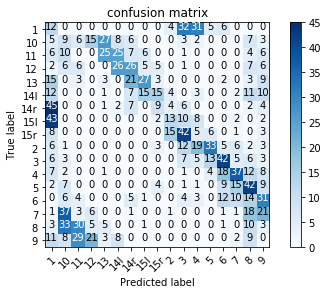

Normalized confusion matrix
[[0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.36 0.34 0.06 0.07
  0.   0.   0.  ]
 [0.05 0.1  0.07 0.16 0.3  0.09 0.07 0.   0.   0.   0.03 0.02 0.   0.
  0.   0.08 0.03]
 [0.07 0.11 0.   0.   0.28 0.28 0.08 0.07 0.   0.   0.01 0.   0.   0.
  0.   0.04 0.07]
 [0.02 0.07 0.07 0.   0.   0.29 0.29 0.06 0.06 0.   0.01 0.   0.   0.
  0.   0.08 0.07]
 [0.17 0.   0.03 0.   0.03 0.   0.24 0.31 0.03 0.   0.   0.   0.   0.02
  0.   0.03 0.1 ]
 [0.15 0.   0.   0.   0.01 0.   0.09 0.19 0.19 0.05 0.   0.04 0.   0.
  0.03 0.14 0.12]
 [0.56 0.   0.   0.   0.01 0.03 0.09 0.   0.11 0.05 0.07 0.   0.   0.
  0.   0.03 0.05]
 [0.54 0.   0.   0.   0.   0.   0.   0.   0.03 0.16 0.12 0.1  0.   0.
  0.03 0.   0.03]
 [0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.19 0.53 0.06 0.07 0.
  0.01 0.   0.04]
 [0.07 0.01 0.   0.   0.   0.   0.   0.   0.03 0.   0.13 0.21 0.37 0.06
  0.07 0.02 0.03]
 [0.07 0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.08 0.06 0.14 0.47
  0.06 0.07 0.

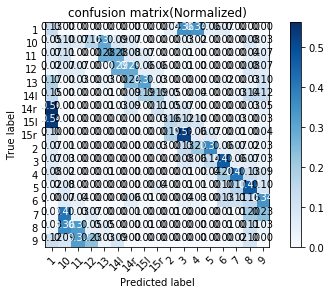

In [137]:
pr.confuse_matrix_plot(encoder.transform(yy),encoder.transform(vv),encoder.classes_,title="confusion matrix")

In [115]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_pyther-20sample-178dp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_pyther-20sample-178dp.h5")
print("Saved model to disk")


Saved model to disk
